## Informe Trabajo Práctico 4

#### Juana Rapoport



####  INTRODUCCIÓN
Este informe tiene como objetivo aplicar métodos de inferencia estadística para ajustar un modelo paramétrico a datos observacionales de densidad de galaxias (galaxias por Mpc³) en función de sus magnitudes. En particular, se implementa el algoritmo de Metropolis-Hastings para realizar simulaciones Monte Carlo mediante Cadenas de Markov (MCMC). Estas simulaciones permiten explorar el espacio de parámetros y estimar la función de verosimilitud, buscando identificar aquellos valores de parámetros que maximizan dicha función y que proporcionan el mejor ajuste al conjunto de datos.

Además, se utiliza la técnica de gradiente descendente para hallar el extremo de la función de verosimilitud como alternativa de optimización, comparando los parámetros obtenidos con ambos métodos en términos de ajuste y precisión. Finalmente, se analizan los resultados y se discute la efectividad de cada enfoque en la optimización de un modelo paramétrico para los datos observados, resaltando las ventajas y limitaciones de los métodos utilizados.

Primero, se grafican los datos correspondientes a la función de luminosidad de galaxias obtenida por Blanton et al. (2001), que describe la densidad numérica de galaxias por Mpc³ en función de sus magnitudes absolutas, junto con la función de Schechter, que servirá como modelo paramétrico para ajustar dichos datos. La función de Schechter está dada por:

$$
\phi(M) \, dM = \phi_0 \, 0.4 \ln(10) \, 10^{-0.4(M - M_0)(\alpha_0 + 1)} \, \exp(-10^{-0.4(M - M_0)}) \, dM
$$

De acuerdo con la bibliografía mencionada, los parámetros que mejor ajustan el modelo a los datos presentan los siguientes valores:

$$
M_0 = -20.83 \pm 0.03
$$
$$
\phi_0 = (1.46 \pm 0.12) \times 10^{-2}
$$
$$
\alpha_0 = -1.20 \pm 0.03
$$

No obstante, el objetivo es obtener estos parámetros de manera independiente mediante distintos métodos de ajuste, permitiendo así un análisis y comparación de los resultados obtenidos con los valores reportados en la bibliografía.


In [ ]:
# Cargamos los paquetes a utilizar
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Conectamos a Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Cargamos los datos
data = pd.read_csv('datos.csv')
data.head()

MAG       PHI  error_inf  error_sup
0 -23.183  0.000003   0.000002   0.000003
1 -23.020  0.000005   0.000003   0.000005
2 -22.870  0.000017   0.000005   0.000009
3 -22.698  0.000035   0.000009   0.000010
4 -22.565  0.000082   0.000024   0.000023

In [ ]:
# Extraer columnas del dataframe
M = data['MAG']
f = data['PHI']
e_inf = np.abs(f - data['error_inf'])  # Asegurarse de que los errores sean positivos
e_sup = np.abs(data['error_sup'] - f)

# Parámetros iniciales (provenientes de la guía) para la función de Schechter
p0_c = [-20.83, 1.46 * 10**(-2), -1.20]  # p0 = [M_0, phi_0, alpha]

# Definir el modelo de la función de Schechter
def phi_model(M, params=p0):

    M_0, phi_0, alpha = params
    y = 0.4 * np.log(10) * phi_0 * 10**(-0.4 * (M - M_0) * (alpha + 1)) * np.exp(-10**(-0.4 * (M - M_0)))
    return y

# Calcular los valores del modelo de Schechter para el rango de magnitudes
M_range = np.linspace(min(M), max(M), 100)  # Crear un rango continuo para M
f_model = phi_model(M_range, p0_c)


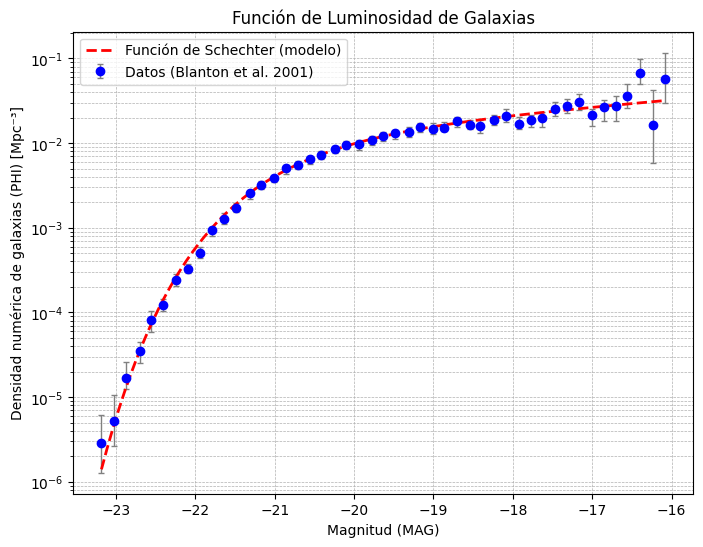

In [ ]:
f_error = [data['error_inf'],data['error_sup']]
# Graficar los datos y el modelo
plt.figure(figsize=(8, 6))

plt.errorbar(M, f, yerr=[data['error_inf'],data['error_sup']], fmt='o', color='blue', ecolor='gray', elinewidth=1, capsize=2, label='Datos (Blanton et al. 2001)')
plt.plot(M_range, f_model, color='red', linestyle='--', linewidth=2, label='Función de Schechter (modelo)')
plt.yscale('log')
plt.xlabel('Magnitud (MAG)')
plt.ylabel('Densidad numérica de galaxias (PHI) [Mpc⁻³]')
plt.title('Función de Luminosidad de Galaxias')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

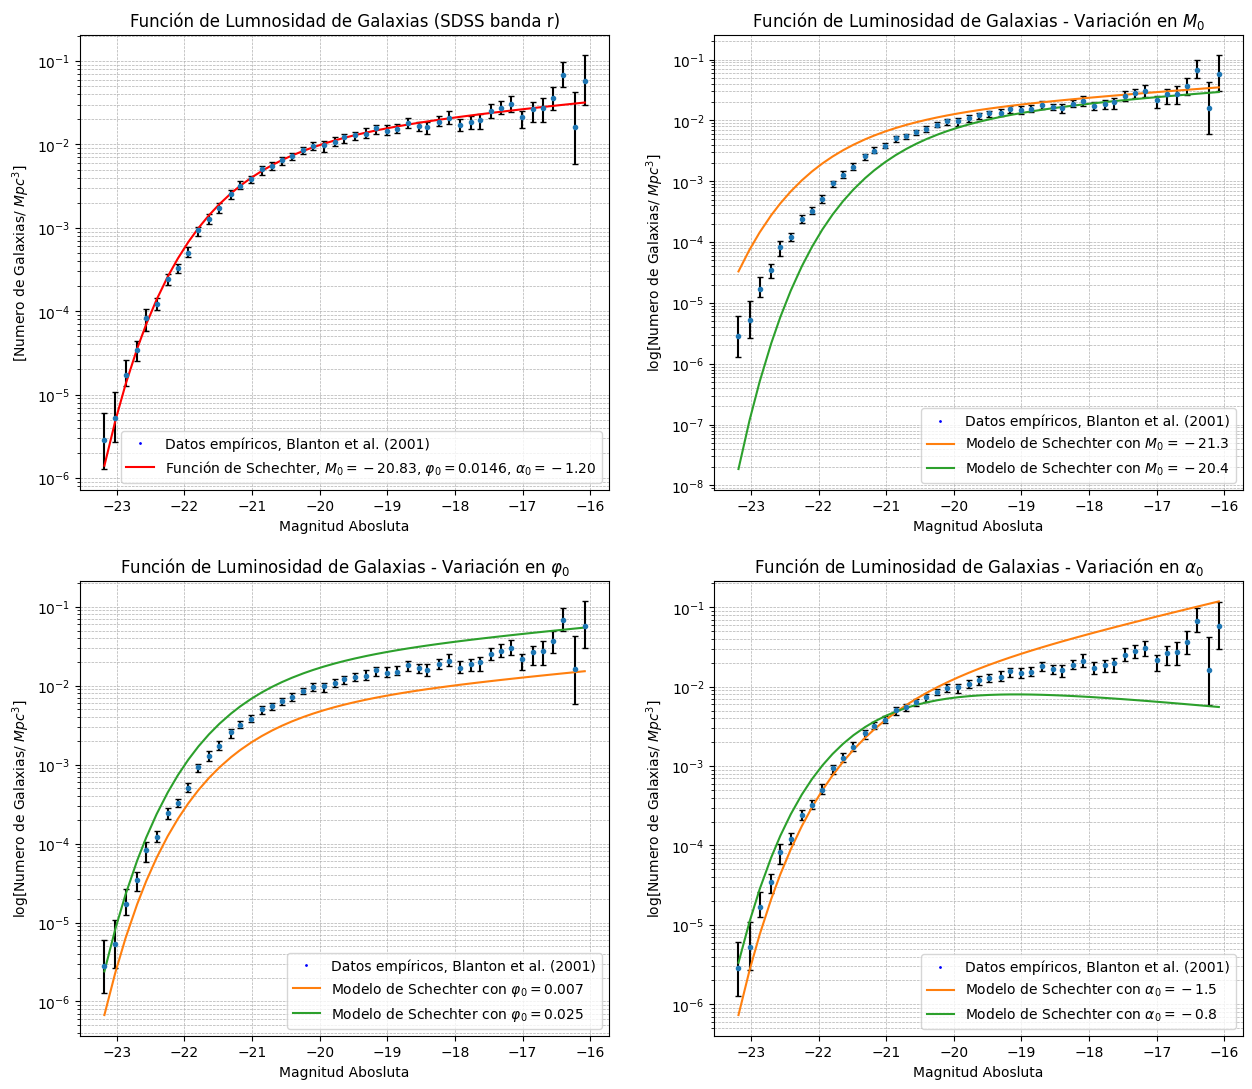

In [ ]:
plt.figure(figsize=(15, 13))
plt.subplot(2,2,1)
f_error = [data['error_inf'],data['error_sup']]
plt.plot(M , f , '.' , ms = 2 , color = 'b', label="Datos empíricos, Blanton et al. (2001)")
plt.errorbar(M,f, yerr = f_error, fmt=".", capsize=2, ecolor="k")

plt.xlabel('Magnitud Abosluta')
plt.ylabel(r'[Numero de Galaxias/ $Mpc^3$]')

plt.title('Función de Lumnosidad de Galaxias (SDSS banda r)')
y_teor =  phi_model(M, p0_c)
plt.plot(M , y_teor  , color = 'r',label=r"Función de Schechter, $M_{0}=-20.83$, $φ_{0} = 0.0146$, $α_{0}=-1.20$")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.semilogy()
plt.legend()


plt.subplot(2,2,2)
param_low_M = (-21.3 , 1.46*10**(-2) , -1.20)   #vario el M (hacia valores mas chicos)
param_up_M = (-20.4, 1.46*10**(-2) , -1.20)   #vario el M (hacia valores mas grandes)

# veamos como afecta al modelo  variaciones en M
plt.plot(M , f , '.' , ms = 2 , color = 'b', label="Datos empíricos, Blanton et al. (2001)")
plt.errorbar(M,f, yerr = f_error, fmt=".", capsize=2, ecolor="k")
y_lM = phi_model(M , param_low_M)  #lower M
plt.plot(M , y_lM  ,label= r"Modelo de Schechter con $M_{0} = -21.3$")
y_uM = phi_model(M , param_up_M)  #upper M
plt.plot(M , y_uM ,label="Modelo de Schechter con $M_{0} = -20.4$")
plt.xlabel('Magnitud Abosluta')
plt.ylabel(r'log[Numero de Galaxias/ $Mpc^3$]')
plt.title(r'Función de Luminosidad de Galaxias - Variación en $M_{0}$')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.semilogy()
plt.legend()


plt.subplot(2,2,3)
param_lowfi =  (-20.83 , 0.007, -1.20)   #vario el phi (hacia valores mas chicos)
param_upfi = (-20.83 , 0.025, -1.20)   #vario el phi (hacia valores mas grandes)
# veamos como afecta al modelo  variaciones en Phi
plt.plot(M , f , '.' , ms = 2 , color = 'b', label="Datos empíricos, Blanton et al. (2001)")
plt.errorbar(M,f, yerr = f_error, fmt=".", capsize=2, ecolor="k")
y_lfi = phi_model(M , param_lowfi)
plt.plot(M , y_lfi  ,label=r"Modelo de Schechter con $φ_{0} = 0.007$")
y_ufi = phi_model(M , param_upfi)
plt.plot(M ,y_ufi ,label=r"Modelo de Schechter con $φ_{0} = 0.025$")
plt.xlabel('Magnitud Abosluta')
plt.ylabel(r'log[Numero de Galaxias/ $Mpc^3$]')
plt.title(r'Función de Luminosidad de Galaxias - Variación en $φ_{0}$')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.semilogy()
plt.legend()


plt.subplot(2,2,4)
param_lowalph = (-20.83 , 1.46*10**(-2) , -1.5)   #vario el alpha (hacia valores mas chicos)
param_upalph = (-20.83 , 1.46*10**(-2) , -0.8)   #vario el alpha (hacia valores mas grandes)
# veamos como afecta al modelo  variaciones en alpha
plt.plot(M , f , '.' , ms = 2 , color = 'b', label="Datos empíricos, Blanton et al. (2001)")
plt.errorbar(M,f, yerr = f_error, fmt=".", capsize=2, ecolor="k")
y_lalph = phi_model(M, param_lowalph)
plt.plot(M , y_lalph  ,label=r"Modelo de Schechter con $α_{0} = -1.5$")
y_ualph = phi_model(M, param_upalph)
plt.plot(M , y_ualph  ,label=r"Modelo de Schechter con $α_{0} = -0.8$")
plt.xlabel('Magnitud Abosluta')
plt.ylabel(r'log[Numero de Galaxias/ $Mpc^3$]')
plt.title(r'Función de Luminosidad de Galaxias - Variación en $α_{0}$')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.semilogy()
plt.legend()

Se puede observar en la figura anterior que variando cada uno de los parametros y manteniendo al resto fijos, se puede definir un cierto intervalo para cada parametro, cuyos valores extremos estan dados por estas funciones limites que ya se desvian suficientemente de los datos como para decir que ya no producen un buen ajuste. Estos intervalos se tomaron de manera tal que las funciones limites que producen lleguen a contener las barras de error de los datos.

Se definen entonces los siguientes intervalos como los mas probables de contener los valores optimos de los parametros:

$ I_{M_0} = (-22 \,\, , \,\, -20)$

$ I_{\phi_0} = (0.005 \,\, , \,\, 0.035)$

$ I_{\alpha_0} = (-1.8 \,\, , \,\, -0.7)$

Dado que, a priori, no se tiene mas informacion que esta respecto de los valores que pueden llegar a tener los parametros, se utilizara un prior plano, definido como :

$$  prior:  p(\phi,m) = \left\{
    \begin{array}\\
        1 & \mbox{if } \ \phi \in R \\
        0 & \mbox{else.}
    \end{array}
\right. $$
Donde R es una ragion en el espacio 3D dada por: $ R = I_{M_0}\,$ x $\,I_{\phi_0}\,$x$\,I_{\alpha_0} $           
           
A continuacion, se definen las funciones relevantes: Likelihood, Prior y Probabilidad Posterior, al final se decidio trabajar con el logaritmo de dichas funciones por ser mas comodo y ademas porque no cambia el comportamiento (creciente o decreciente) de las mismas. Con lo cual, tenemos que
 $$log(Likelihood) : \log(p(d | \phi,m)) = \sum_{j=1}^N -((\frac{Phi[j] - m(Mag[j],\phi)}{\sigma[j]})^2) $$

 $$  log(prior):  \log(p(\phi,m)) = \left\{
    \begin{array}\\
        0 & \mbox{if } \ \phi \in R \\
        -∞ & \mbox{else.}
    \end{array}
\right. $$

$$ \log(Probabilidad\,\,Posterior):\,\,log(p(\phi | d,m)) = \left\{
    \begin{array}\\
        \log(p(d | \phi,m)) & \mbox{if } \ \phi \in R \\
        ∞ & \mbox{else.}
    \end{array}
\right. $$

La inferencia estadistica se puede llevar a cabo como una aplicacion del teorema de Bayes. Dado un conjunto de datos d que se puede describir mediante un modelo m con parametros $\phi$, se desea obtener el mejor ajuste. Es decir que el objetivo es maximizar la probabilidad posterior de los parametros $p(\phi | d,m)$, para un modelo parametrico m, dados los datos (que el modelo intenta describir).

Por otro lado, se tiene que esta probabilidad posterior es proporcional al Likelihood $p(d | \phi,m) = \prod_{j=1}^N \exp(-(\frac{Phi[j] - m(Mag[j],\phi)}{\sigma[j]})^2) $, al prior $ p(\phi,m)$ es decir aquello que ya se conoce de los parametros, y  esta normalizado por la evidencia  $p(d,m) $ la cual se toma en este caso igual a 1, i.e $p(d,m)=1$. Por lo tanto:
$$ Probabilidad\,\, Posterior:\,\,  p(\phi | d,m) = \frac{p(d | \phi,m)p(\phi,m)}{p(d,m)=1} = p(d | \phi,m)p(\phi,m)           $$

In [ ]:
# Intervalos para los priors de los parámetros
intervalo_M = [-22, -20]
intervalo_phi = [0.005, 0.035]
intervalo_alpha = [-1.8, -0.7]

# Parámetros iniciales
p0_c = [-20.83, 1.46e-2, -1.20]  # Valores iniciales: M_0, phi_0, alpha

# Definir las funciones para Likelihood, Prior y Posterior

def log_likelihood(data, model, param):

    M, f = data
    sigma = (e_inf + e_sup) * 0.5  # Error promedio
    suma = np.sum(((f - model(M, param))**2) / (2.0 * sigma**2))
    return -suma

def log_prior(param, M_range=intervalo_M, phi_range=intervalo_phi, alpha_range=intervalo_alpha):

    M, phi, alpha = param
    if (M_range[0] < M < M_range[1]) and (phi_range[0] < phi < phi_range[1]) and (alpha_range[0] < alpha < alpha_range[1]):
        return 0  # Prior uniforme dentro del rango
    else:
        return -np.inf  # Prior cero fuera del rango

def log_posterior(data, model, param):

    log_l =  log_likelihood(data, model, param)
    log_p = log_prior(param)
    return log_l + log_p

# Definir el modelo de Schechter
def phi_model(M, params):

    M_0, phi_0, alpha = params
    y = 0.4 * np.log(10) * phi_0 * 10**(-0.4 * (M - M_0) * (alpha + 1)) * np.exp(-10**(-0.4 * (M - M_0)))
    return y

# Ejecutar y evaluar el valor del log-posterior con los parámetros iniciales
datos = [data['MAG'], data['PHI']]
log_post_val = log_posterior(datos, phi_model, p0_c)

print('El valor inicial del log-posterior con los parámetros iniciales es:', p0_c, log_post_val)


El valor inicial del log-posterior con los parámetros iniciales es: [-20.83, 0.0146, -1.2] -5.504852111141818


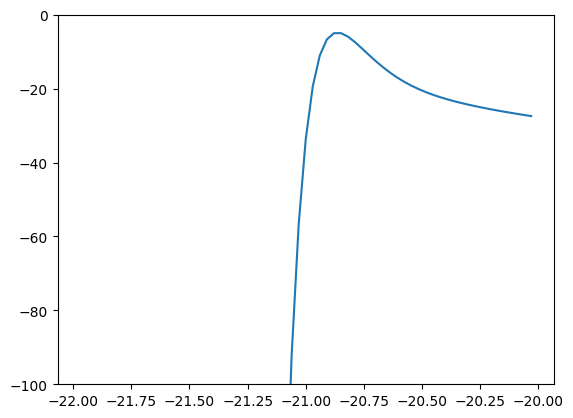

In [ ]:
M = data['MAG']
f = data['PHI']
#p0 = [-20.83, 1.46e-2, -1.20]  # Valores iniciales: M_0, phi_0, alpha
poste=[]
M_list = np.linspace(-23,-20,100)
for i in range(len(M_list)):
  p0 = [M_list[i],1.4e-2,-1.2]  # Valores iniciales: M_0, phi_0, alpha
  a=phi_model(M,p0)
  #print(log_posterior(datos, phi_model, p0))
  poste.append(log_posterior(datos, phi_model, p0))
  #print(phi_model(M,p0))

plt.plot(M_list,poste)
plt.ylim(-100,0)
plt.show()

#print(phi_model(M,p0))


A continucion se implementa el algorimto de Metropolis-Hastings para explorar el espacio de parametros y en este caso se decide minimizar la funcion (-)likelihood en vez de maximizar el (+)likelihood.
Es decir se minimiza la funcion  $$-log(Likelihood) : -\log(p(d | \phi,m)) = \sum_{j=1}^N (\frac{Phi[j] - m(Mag[j],\phi)}{\sigma[j]})^2 $$


El algoritmo de Metropolis-Hastings es un metodo de Cadenas de Markov Monte Carlo (MCMC sigla en ingles), el cual consiste en explorar el espacio de parametros y tiene la caracteristica que el paso siguiente de la cadena depende del paso anterior. Esencialemente,consiste en los sigueintes pasos:

* Tomar un estado inicial $x_{0}$
* Establecer $t=0$
* Iterar cuantas veces queramos
    * Generar un estado candidato x' siguiendo $g(x'|x_{t})$
    * Calcular la probabilidad de aceptación $A(x',x_{t})=\min \left(1,{\frac {P(x')}{P(x_{t})}}{\frac {g(x_{t}|x')}{g(x'|x_{t})}}\right)$
    * Aceptar o rechazar:
        * Generar un número aleatorio uniforme $u\in [0,1]$
        * Si $u\leq A(x',x_{t})$, se acepta el nuevo estado y se toma $x_{t+1}=x'$
        * Si $u>A(x',x_{t})$, se rechaza el nuevo estado y se toma el viejo estado $x_{t+1}=x_{t}$
    * Incrementar $t=t+1$

In [ ]:
# Algoritmo de Metropolis-Hastings para minimizar -log(Likelihood)
def Metropolis_Hastings(data, model, N, M0=-20.5, phi0=0.008, alpha0=-0.9):

    # Definir el tamaño del paso (sigma) para cada parámetro
    M_sigma = (intervalo_M[1] - intervalo_M[0]) / 100.0
    phi_sigma = (intervalo_phi[1] - intervalo_phi[0]) / 100.0
    alpha_sigma = (intervalo_alpha[1] - intervalo_alpha[0]) / 100.0

    # Inicializar matrices para parámetros y -log(Likelihood)
    params = np.zeros((N, 3))  # cada fila contiene los parámetros [M, phi, alpha]
    params[0] = [M0, phi0, alpha0]  # valores iniciales
    Ls = np.zeros(N)  # almacena -log(Likelihood) para cada iteración

    # Evaluar -log(Likelihood) inicial
    Ls[0] = -log_posterior(data, model, params[0])

    # Iterar a lo largo de la cadena de Markov
    for i in range(1, N):
        # Proponer un nuevo punto aleatorio en el espacio de parámetros
        propuesta = [
            params[i - 1][0] + np.random.uniform(-1, 1) * M_sigma,
            params[i - 1][1] + np.random.uniform(-1, 1) * phi_sigma,
            params[i - 1][2] + np.random.uniform(-1, 1) * alpha_sigma
        ]

        # Calcular -log(Likelihood) en la posición actual y en la propuesta
        L_actual = -log_posterior(data, model, params[i - 1])
        L_propuesta = -log_posterior(data, model, propuesta)

        # Calcular la razón de aceptación
        r = L_actual - L_propuesta

        # Aceptación: si r > 0 o con probabilidad exp(r) si r <= 0
        if r > 0 or np.random.rand() < np.exp(r):
            params[i] = propuesta  # Aceptar el nuevo punto
            Ls[i] = L_propuesta    # Actualizar -log(Likelihood)
        else:
            params[i] = params[i - 1]  # Rechazar y mantener el estado actual
            Ls[i] = L_actual

    return params, Ls

# Uso de la función
N = 10000  # Número de iteraciones deseadas
params, Ls = Metropolis_Hastings(datos, phi_model, N)

# Salida: Los parámetros optimizados y el historial de -log(Likelihood)
print("Parámetros finales:", params[-1])
print("Valor de -log(Likelihood) final:", Ls[-1])


Parámetros finales: [-2.09599730e+01  1.17552035e-02 -1.25124466e+00]
Valor de -log(Likelihood) final: 7.16807196898292


Parámetros finales: [-2.09417214e+01  1.07764391e-02 -1.26193548e+00]
Valor de -log(Likelihood) final: 4.881888252194679


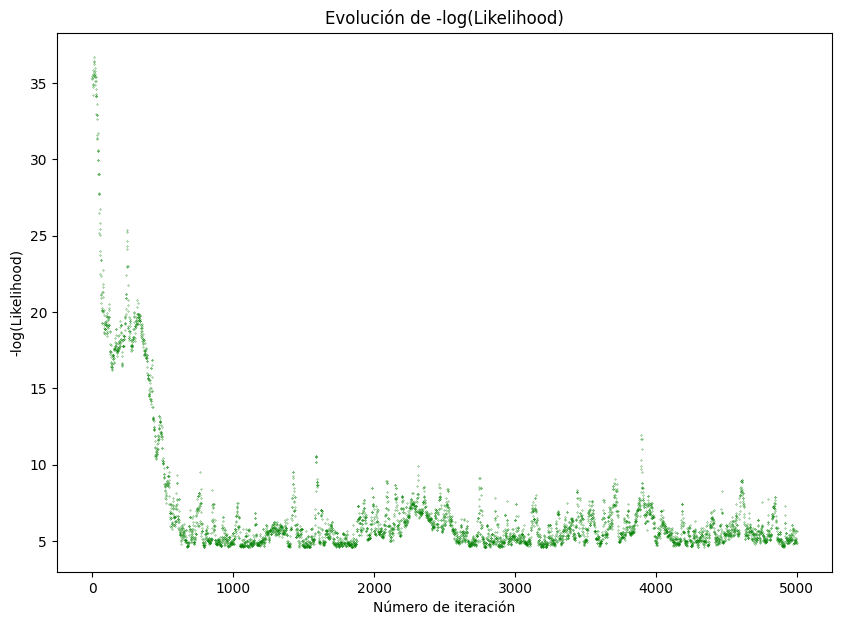

In [ ]:
# Llamada a la función con 5000 iteraciones
params, Ls = Metropolis_Hastings(datos, phi_model, 5000)

# Salida: Los parámetros optimizados y el historial de -log(Likelihood)
print("Parámetros finales:", params[-1])
print("Valor de -log(Likelihood) final:", Ls[-1])

# Gráfico de la evolución de -log(Likelihood)
plt.figure(figsize=(10, 7))
plt.plot(Ls, '.', ms=0.5, color='g')
plt.xlabel('Número de iteración')
plt.ylabel('-log(Likelihood)')
plt.title('Evolución de -log(Likelihood)')
plt.show()

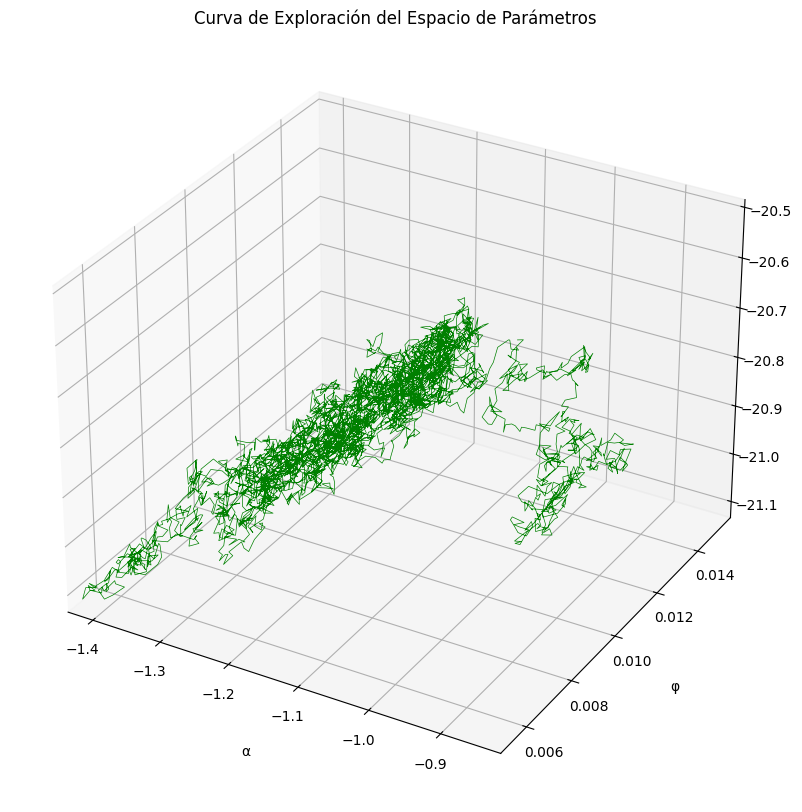

In [ ]:
# Extraer los parámetros de la matriz de resultados
_m = params[:, 0]   # Columna de M
_phi = params[:, 1] # Columna de φ
_alpha = params[:, 2]  # Columna de α

# Configuración del gráfico en 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(_alpha, _phi, _m, color='green', lw=0.5)  # Trazar la curva en 3D

# Etiquetas y título
ax.set_title('Curva de Exploración del Espacio de Parámetros')
ax.set_xlabel('α', labelpad=15)
ax.set_ylabel('φ', labelpad=15)
ax.set_zlabel('M', labelpad=15)

# Ajustes opcionales para los límites (personaliza según tus datos)
ax.set_xlim(np.min(_alpha), np.max(_alpha))
ax.set_ylim(np.min(_phi), np.max(_phi))
ax.set_zlim(np.min(_m), np.max(_m))

plt.show()

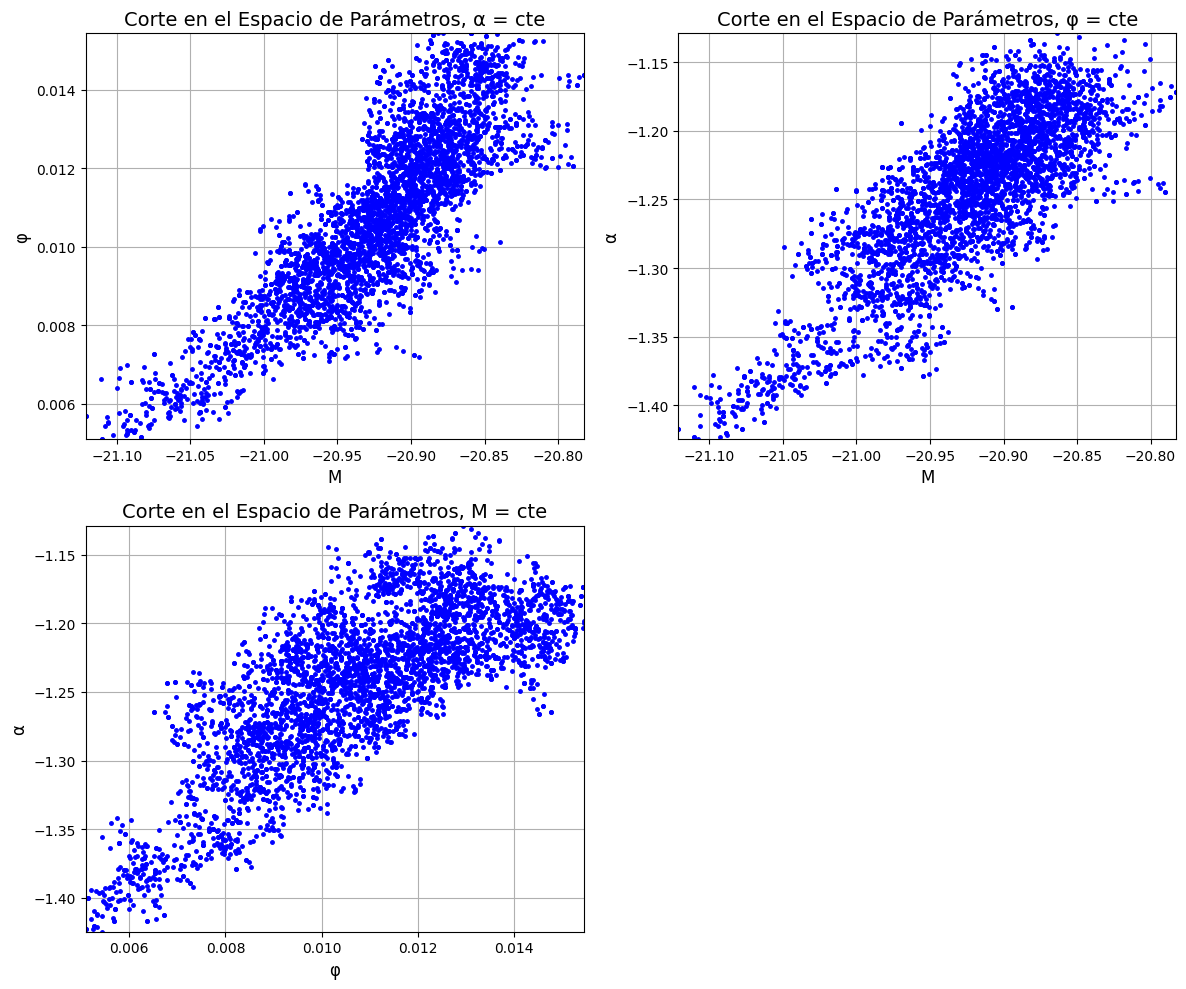

In [ ]:
plt.figure(figsize=(12, 10))

# Corte en el espacio de parámetros para α = constante
plt.subplot(2, 2, 1)
plt.plot(_m[1000:], _phi[1000:], '.', ms=5, color='b')
plt.xlabel('M', fontsize=12)
plt.ylabel('φ', fontsize=12)
plt.title('Corte en el Espacio de Parámetros, α = cte', fontsize=14)
plt.grid()
plt.xlim(np.min(_m[1000:]), np.max(_m[1000:]))
plt.ylim(np.min(_phi[1000:]), np.max(_phi[1000:]))

# Corte en el espacio de parámetros para φ = constante
plt.subplot(2, 2, 2)
plt.plot(_m[1000:], _alpha[1000:], '.', ms=5, color='b')
plt.xlabel('M', fontsize=12)
plt.ylabel('α', fontsize=12)
plt.title('Corte en el Espacio de Parámetros, φ = cte', fontsize=14)
plt.grid()
plt.xlim(np.min(_m[1000:]), np.max(_m[1000:]))
plt.ylim(np.min(_alpha[1000:]), np.max(_alpha[1000:]))

# Corte en el espacio de parámetros para M = constante
plt.subplot(2, 2, 3)
plt.plot(_phi[1000:], _alpha[1000:], '.', ms=5, color='b')
plt.xlabel('φ', fontsize=12)
plt.ylabel('α', fontsize=12)
plt.title('Corte en el Espacio de Parámetros, M = cte', fontsize=14)
plt.grid()
plt.xlim(np.min(_phi[1000:]), np.max(_phi[1000:]))
plt.ylim(np.min(_alpha[1000:]), np.max(_alpha[1000:]))

# Ajustar el layout
plt.tight_layout()
plt.show()


Se puede observar tanto en la figura de la evolucion del Likelihood como en la curva que se dibuja en el espacio de parametros,  que al principio los valores del (-)likelihood son muy grandes y lo mas probable es que el algoritmo de M-H tome aquellos saltos que lo lleven a valores menores. Sin embargo,luego de los 1000 primeros saltos empieza a acercarse al minimo, y alli, dado que tiene  la posibilidad de aceptar valores que lo desvien un poco del minimo, empieza a explorar un poco mas el espacio de parametros, oscilando alrededor de los valores optimos para los parametros que generan el mejor ajuste a los datos.

# Mal mezclado

A continuacion vemos que sucede si no se explora todo el espacio de parametros. Se generan multiples cadenas de manera que todas empiecen de condiciones inciales similares, es decir de una dada region del espacio de parametros, algo conocido tambien como 'mal mezclado' de las cadenas.

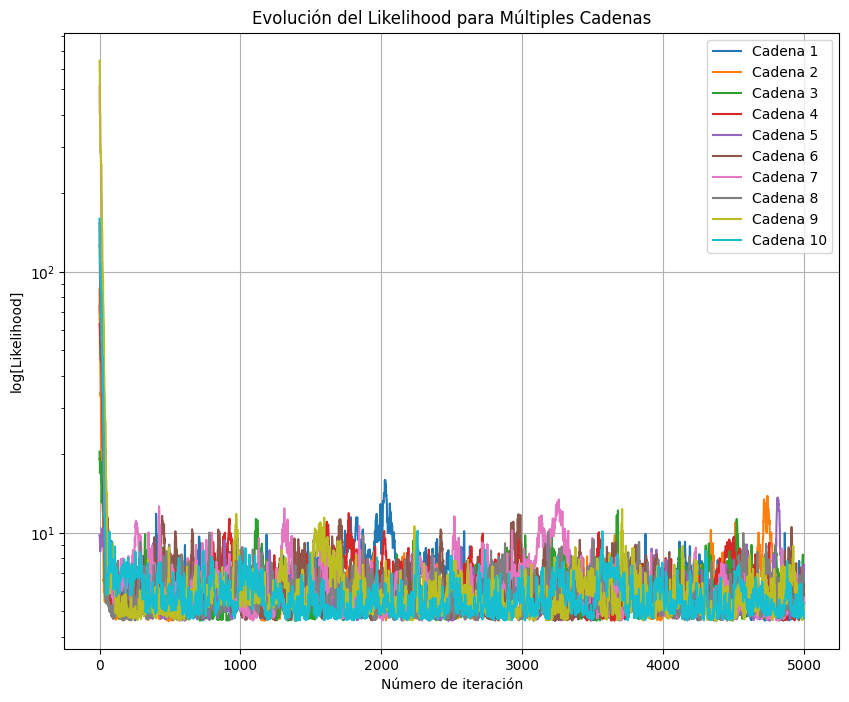

In [ ]:
# Parámetros para múltiples cadenas con condiciones iniciales en la misma región
N_steps = 5000    # Número máximo de pasos en una cadena
n_chains = 10     # Número de cadenas de Markov

# Intervalos para las condiciones iniciales, evitando los extremos
I_M1 = [-21.3, -20.9]
I_fi1 = [0.007, 0.016]
I_a1 = [-1.5, -1.1]

eps = 0.001  # Para evitar los bordes y problemas con priors -inf

# Valores iniciales para cada parámetro
M_values1 = np.linspace(I_M1[0] + eps, I_M1[1] - eps, 50)
fi_values1 = np.linspace(I_fi1[0] + eps, I_fi1[1] - eps, 50)
a_values1 = np.linspace(I_a1[0] + eps, I_a1[1] - eps, 50)

# Fijar semilla para reproducibilidad
np.random.seed(10)
m_init1 = np.random.choice(M_values1, n_chains, replace=False)
f_init1 = np.random.choice(fi_values1, n_chains, replace=False)
a_init1 = np.random.choice(a_values1, n_chains, replace=False)

# Matrices para almacenar los parámetros y los valores del likelihood
par_1 = np.zeros((n_chains, N_steps, 3))
Likeli_1 = np.zeros((n_chains, N_steps))

# Ejecutar el algoritmo Metropolis-Hastings para cada cadena
for i in range(n_chains):
    par_1[i, :, :], Likeli_1[i, :] = Metropolis_Hastings(datos, phi_model, N_steps, m_init1[i], f_init1[i], a_init1[i])

# Visualización de la evolución del likelihood en cada cadena
plt.figure(figsize=(10, 8))
for i in range(n_chains):
    plt.plot(Likeli_1[i, :], label=f'Cadena {i+1}')

plt.xlabel('Número de iteración')
plt.ylabel('log[Likelihood]')
plt.yscale('log')
plt.grid()
plt.legend()
plt.title('Evolución del Likelihood para Múltiples Cadenas')
plt.show()


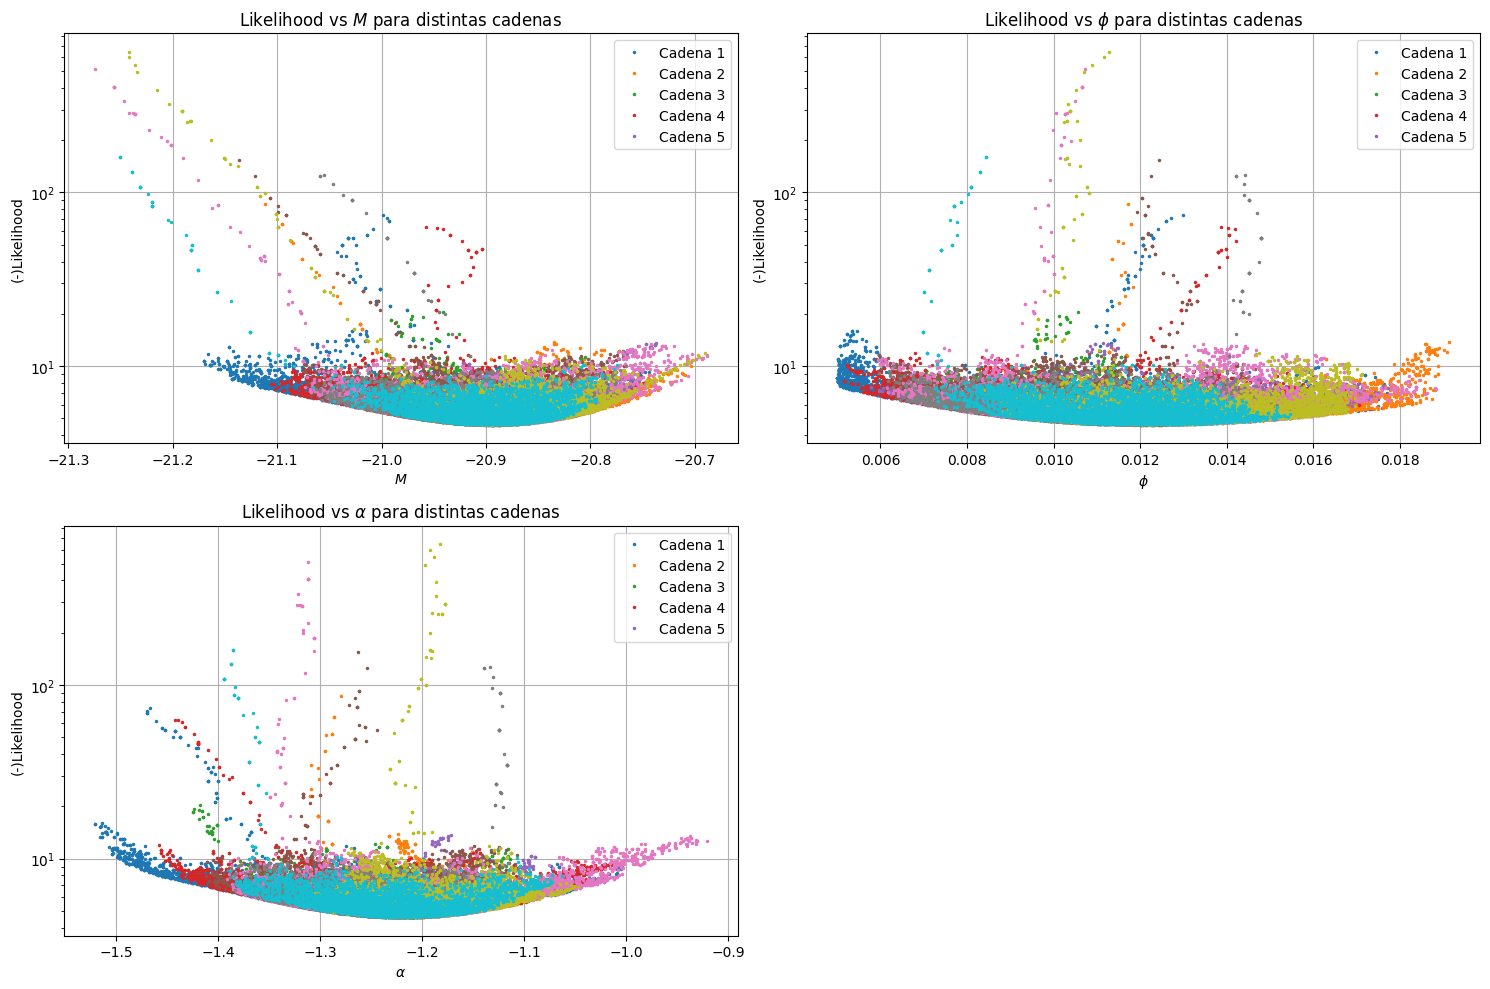

In [ ]:
# Configuración de la figura con 3 subgráficos
plt.figure(figsize=(15, 10))

# Subgráfico 1: Likelihood vs M
plt.subplot(2, 2, 1)
for i in range(n_chains):
    plt.plot(par_1[i, :, 0], Likeli_1[i, :], '.', ms=3, label=f'Cadena {i+1}' if i < 5 else "")
plt.xlabel('$M$')
plt.ylabel('(-)Likelihood')
plt.yscale('log')
plt.grid(True)
plt.title('Likelihood vs $M$ para distintas cadenas')
plt.legend(loc='best')

# Subgráfico 2: Likelihood vs φ
plt.subplot(2, 2, 2)
for i in range(n_chains):
    plt.plot(par_1[i, :, 1], Likeli_1[i, :], '.', ms=3, label=f'Cadena {i+1}' if i < 5 else "")
plt.xlabel('$\phi$')
plt.ylabel('(-)Likelihood')
plt.yscale('log')
plt.grid(True)
plt.title('Likelihood vs $\phi$ para distintas cadenas')
plt.legend(loc='best')

# Subgráfico 3: Likelihood vs α
plt.subplot(2, 2, 3)
for i in range(n_chains):
    plt.plot(par_1[i, :, 2], Likeli_1[i, :], '.', ms=3, label=f'Cadena {i+1}' if i < 5 else "")
plt.xlabel('$\\alpha$')
plt.ylabel('(-)Likelihood')
plt.yscale('log')
plt.grid(True)
plt.title('Likelihood vs $\\alpha$ para distintas cadenas')
plt.legend(loc='best')

# Ajuste de espacio entre subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()






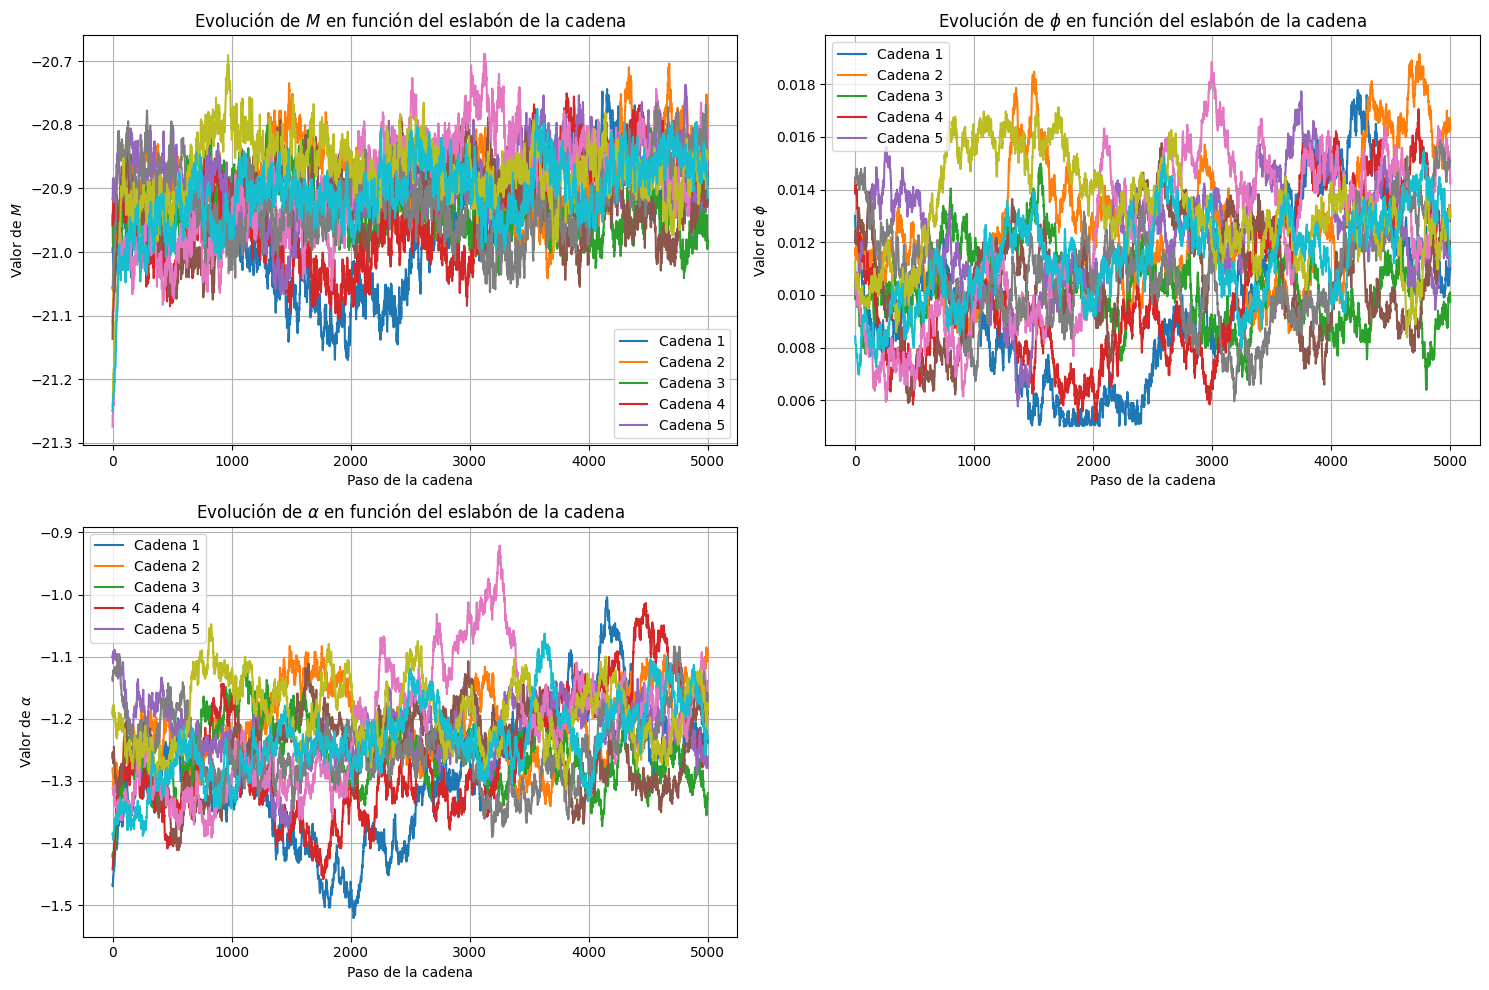

In [ ]:
# Gráfico 2: Evolución del valor del parámetro en función del eslabón de la cadena
plt.figure(figsize=(15, 10))

# Subgráfico 1: Evolución de M
plt.subplot(2, 2, 1)
for i in range(n_chains):
    plt.plot(range(N_steps), par_1[i, :, 0], '-', ms=3, label=f'Cadena {i+1}' if i < 5 else "")
plt.xlabel('Paso de la cadena')
plt.ylabel('Valor de $M$')
plt.grid(True)
plt.title('Evolución de $M$ en función del eslabón de la cadena')
plt.legend(loc='best')

# Subgráfico 2: Evolución de φ
plt.subplot(2, 2, 2)
for i in range(n_chains):
    plt.plot(range(N_steps), par_1[i, :, 1], '-', ms=3, label=f'Cadena {i+1}' if i < 5 else "")
plt.xlabel('Paso de la cadena')
plt.ylabel('Valor de $\phi$')
plt.grid(True)
plt.title('Evolución de $\phi$ en función del eslabón de la cadena')
plt.legend(loc='best')

# Subgráfico 3: Evolución de α
plt.subplot(2, 2, 3)
for i in range(n_chains):
    plt.plot(range(N_steps), par_1[i, :, 2], '-', ms=3, label=f'Cadena {i+1}' if i < 5 else "")
plt.xlabel('Paso de la cadena')
plt.ylabel('Valor de $\\alpha$')
plt.grid(True)
plt.title('Evolución de $\\alpha$ en función del eslabón de la cadena')
plt.legend(loc='best')

# Ajuste de espacio entre subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()

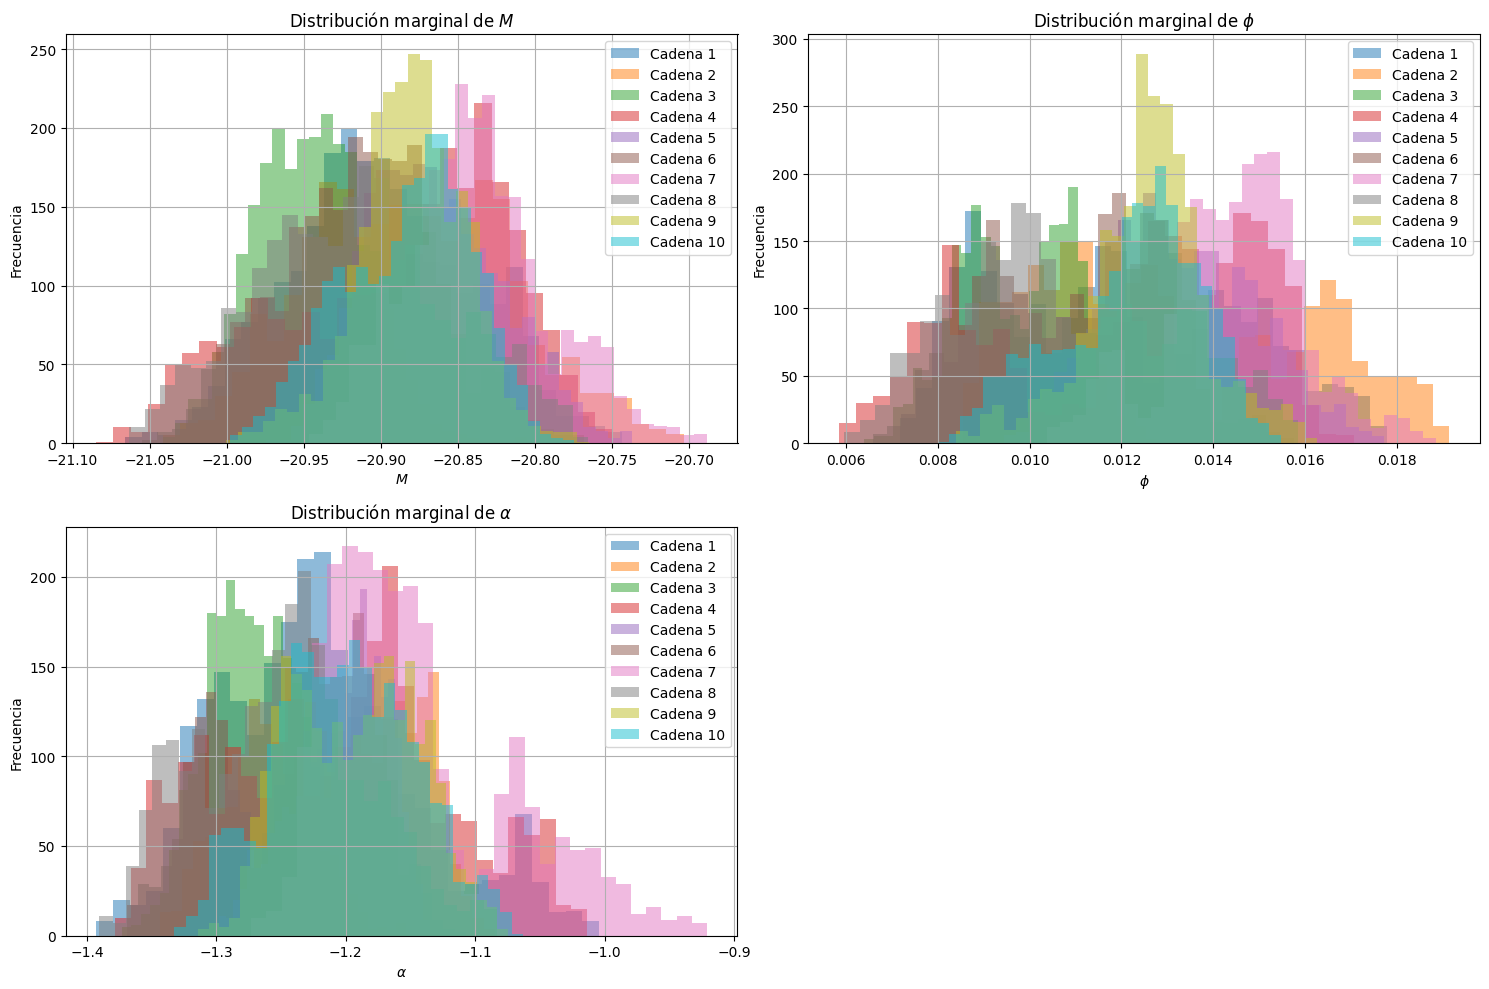

In [ ]:
# Gráfico 3: Distribución marginal de los valores del parámetro
plt.figure(figsize=(15, 10))

# Subgráfico 1: Distribución marginal de M
plt.subplot(2, 2, 1)
for i in range(n_chains):
    plt.hist(par_1[i, int(N_steps/2):, 0], bins=30, alpha=0.5, label=f'Cadena {i+1}')
plt.xlabel('$M$')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.title('Distribución marginal de $M$')
plt.legend(loc='best')

# Subgráfico 2: Distribución marginal de φ
plt.subplot(2, 2, 2)
for i in range(n_chains):
    plt.hist(par_1[i, int(N_steps/2):, 1], bins=30, alpha=0.5, label=f'Cadena {i+1}')
plt.xlabel('$\phi$')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.title('Distribución marginal de $\phi$')
plt.legend(loc='best')

# Subgráfico 3: Distribución marginal de α
plt.subplot(2, 2, 3)
for i in range(n_chains):
    plt.hist(par_1[i, int(N_steps/2):, 2], bins=30, alpha=0.5, label=f'Cadena {i+1}')
plt.xlabel('$\\alpha$')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.title('Distribución marginal de $\\alpha$')
plt.legend(loc='best')

# Ajuste de espacio entre subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()


<ipython-input-50-c65f07f3eee3>:18: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  k = kde.gaussian_kde([x, y])  # Estimación de densidad por kernel


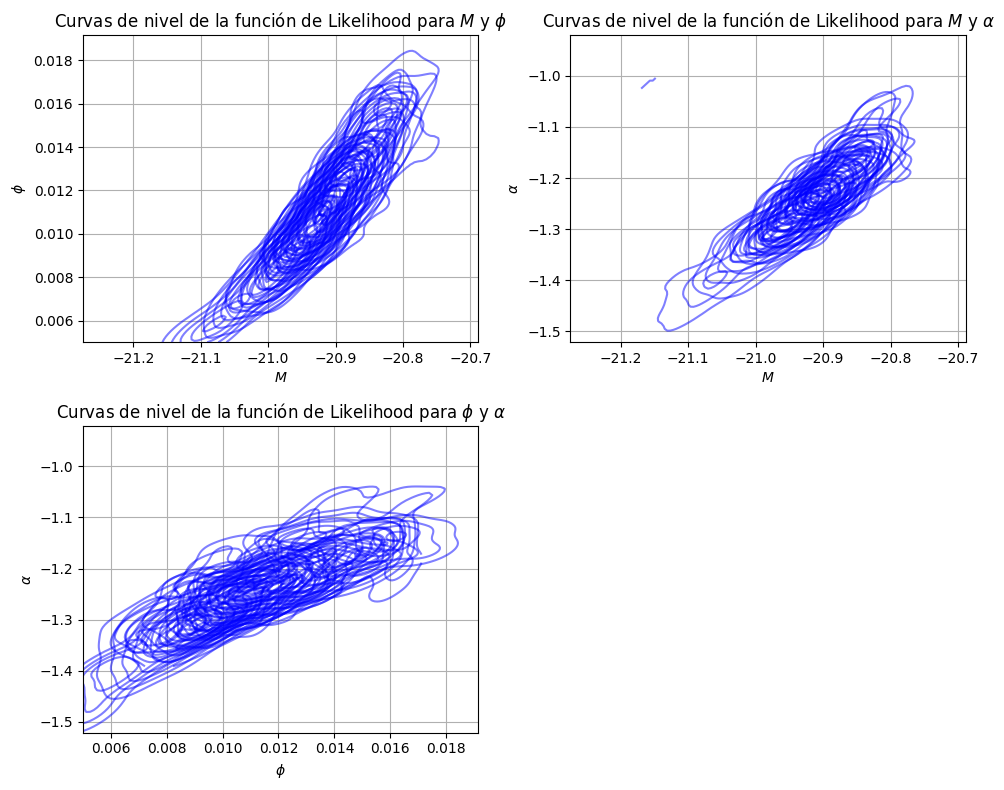

In [ ]:
from scipy.stats import kde
# Gráfico de curvas de nivel para las combinaciones de parámetros

# Etiquetas para los parámetros
param_labels = ['$M$', '$\\phi$', '$\\alpha$']
param_pairs = [(0, 1), (0, 2), (1, 2)]  # Índices de las combinaciones de parámetros

# Configuración de la figura con 3 subgráficos
plt.figure(figsize=(10, 8))

# Graficar las combinaciones de parámetros como subgráficos
for idx, pair in enumerate(param_pairs):
    plt.subplot(2, 2, idx + 1)

    for i in range(n_chains):
        x = par_1[i, :, pair[0]]  # Primer parámetro de la combinación
        y = par_1[i, :, pair[1]]  # Segundo parámetro de la combinación
        k = kde.gaussian_kde([x, y])  # Estimación de densidad por kernel
        xi, yi = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
        zi = k(np.vstack([xi.flatten(), yi.flatten()]))
        plt.contour(xi, yi, zi.reshape(xi.shape), colors='blue', alpha=0.5)

    plt.xlabel(param_labels[pair[0]])
    plt.ylabel(param_labels[pair[1]])
    plt.title(f'Curvas de nivel de la función de Likelihood para {param_labels[pair[0]]} y {param_labels[pair[1]]}')
    plt.grid()

plt.tight_layout()
plt.show()

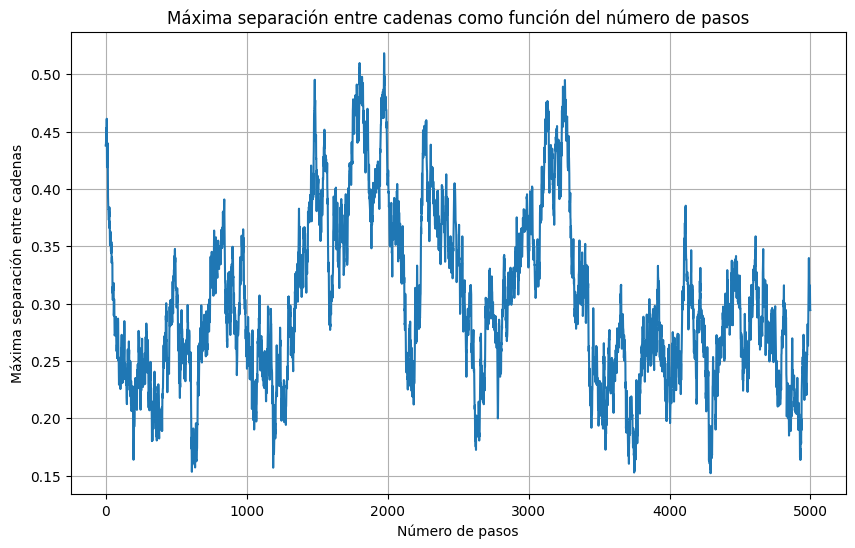

In [ ]:
distancias = []
for step in range(N_steps):
    max_distancia = np.max([np.linalg.norm(par_1[i, step] - par_1[j, step])
                           for i in range(n_chains) for j in range(i+1, n_chains)])
    distancias.append(max_distancia)

plt.figure(figsize=(10, 6))
plt.plot(range(N_steps), distancias, '-')
plt.xlabel('Número de pasos')
plt.ylabel('Máxima separación entre cadenas')
plt.grid()
plt.title('Máxima separación entre cadenas como función del número de pasos')
plt.show()


# Buen mezclado

A continuacion, se genera un conjunto de cadenas con un buen mezlcado, es decir que aleatoriamente se elijen valores iniciales en todo el rango posible de parametros.

In [ ]:
N_steps = 5000   #numeros maximo de pasos en una cadena
n_chains = 10     # numero de cadenas de Markov

I_M = [-21.3, -20.4]
I_fi = [0.007 , 0.025]
I_a = [-1.5 , -0.8]

eps = 0.001  # no quiero que me elija los extremos del intervalo porque el prior va a dar -inf
M_values = np.linspace(I_M[0] + eps , I_M[1] - eps , 50)
fi_values = np.linspace(I_fi[0] + eps , I_fi[1] - eps , 50)
a_values = np.linspace(I_a[0] + eps , I_a[1] - eps , 50)


m_init = np.random.choice(M_values , n_chains , replace=False)
#print(m_init)
phi_init = np.random.choice(fi_values , n_chains, replace=False )
#print(f_init)
alpha_init = np.random.choice(a_values , n_chains, replace=False)

# Inicializa y corre múltiples cadenas
par_2 = np.zeros((n_chains, N_steps, 3))
likelihood_2 = np.zeros((n_chains, N_steps))

for i in range(n_chains):
    par_2[i, :, :], likelihood_2[i, :] = Metropolis_Hastings(datos, phi_model, N_steps, m_init[i], phi_init[i], alpha_init[i])

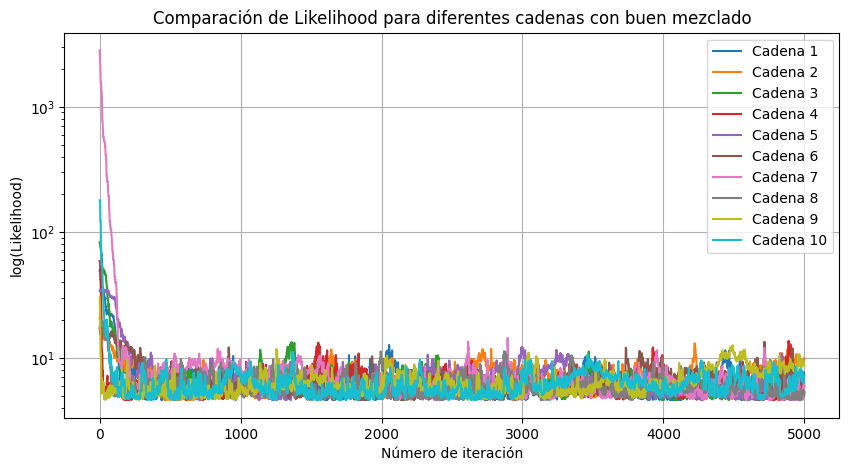

In [ ]:
# Visualización de las cadenas
plt.figure(figsize=(10, 5))
for i in range(n_chains):
    plt.plot(likelihood_2[i, :], label=f'Cadena {i+1}')

plt.xlabel('Número de iteración')
plt.ylabel('log(Likelihood)')
plt.yscale('log')
plt.grid()
plt.semilogy()
plt.title('Comparación de Likelihood para diferentes cadenas con buen mezclado')
plt.legend(loc='best')
plt.show()


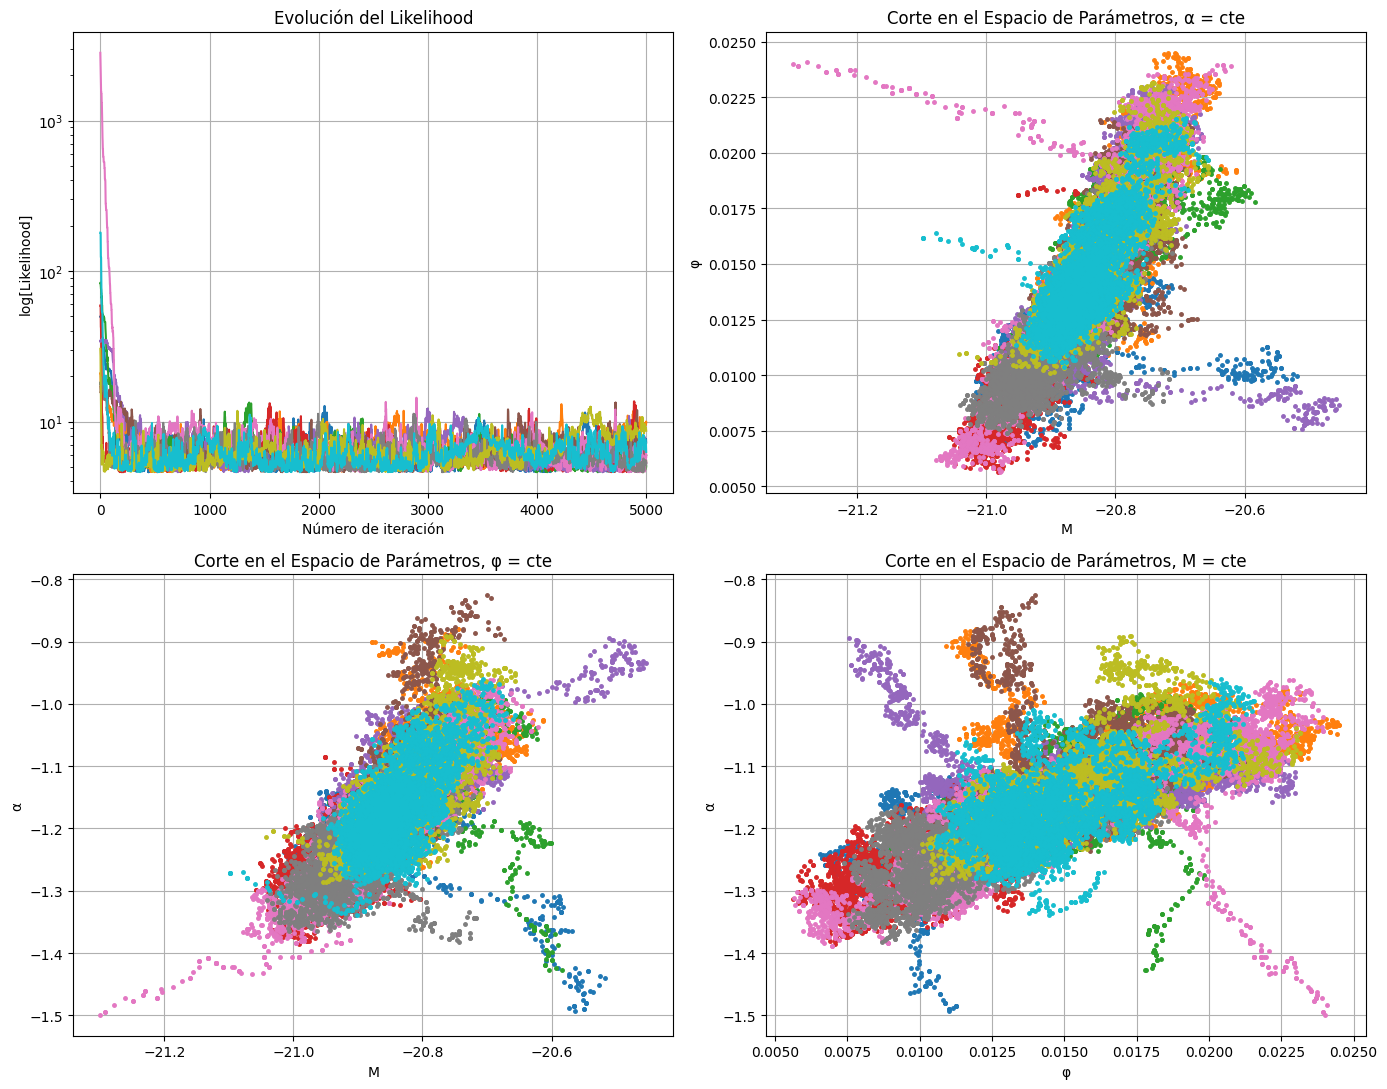

In [ ]:
# Configuración de la figura
plt.figure(figsize=(14, 11))

# Subgráfico 1: Evolución del Likelihood
plt.subplot(2, 2, 1)
for i in range(n_chains):
    plt.plot(likelihood_2[i, :])

plt.xlabel('Número de iteración')
plt.ylabel('log[Likelihood]')
plt.grid(True)
plt.semilogy()
plt.title('Evolución del Likelihood')

# Subgráfico 2: Corte en el Espacio de Parámetros, α = cte
plt.subplot(2, 2, 2)
for i in range(n_chains):
    plt.plot(par_2[i, :, 0], par_2[i, :, 1], '.', ms=5)

plt.xlabel('M')
plt.ylabel('φ')
plt.grid(True)
plt.title('Corte en el Espacio de Parámetros, α = cte')

# Subgráfico 3: Corte en el Espacio de Parámetros, φ = cte
plt.subplot(2, 2, 3)
for i in range(n_chains):
    plt.plot(par_2[i, :, 0], par_2[i, :, 2], '.', ms=5)

plt.xlabel('M')
plt.ylabel('α')
plt.grid(True)
plt.title('Corte en el Espacio de Parámetros, φ = cte')

# Subgráfico 4: Corte en el Espacio de Parámetros, M = cte
plt.subplot(2, 2, 4)
for i in range(n_chains):
    plt.plot(par_2[i, :, 1], par_2[i, :, 2], '.', ms=5)

plt.xlabel('φ')
plt.ylabel('α')
plt.grid(True)
plt.title('Corte en el Espacio de Parámetros, M = cte')

# Ajuste automático del espaciado entre subgráficos
plt.tight_layout()
plt.show()


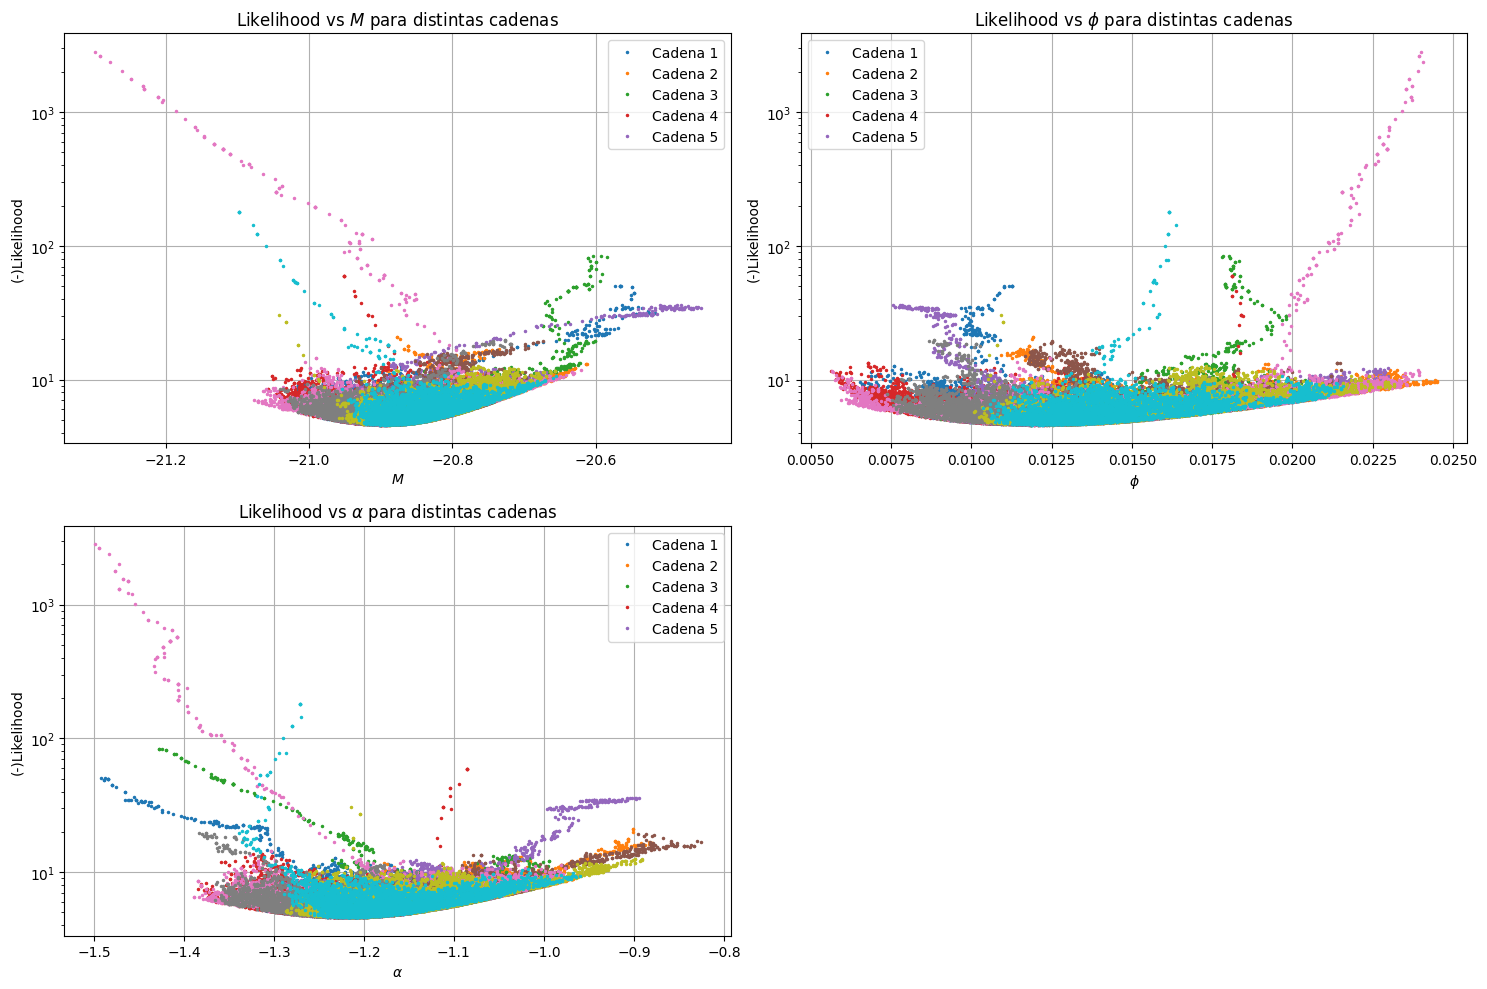

In [ ]:
plt.figure(figsize=(15, 10))

# Subgráfico 1: Likelihood vs M
plt.subplot(2, 2, 1)
for i in range(n_chains):
    plt.plot(par_2[i, :, 0], likelihood_2[i, :], '.', ms=3, label=f'Cadena {i+1}' if i < 5 else "")
plt.xlabel('$M$')
plt.ylabel('(-)Likelihood')
plt.yscale('log')
plt.grid(True)
plt.title('Likelihood vs $M$ para distintas cadenas')
plt.legend(loc='best')

# Subgráfico 2: Likelihood vs φ
plt.subplot(2, 2, 2)
for i in range(n_chains):
    plt.plot(par_2[i, :, 1], likelihood_2[i, :], '.', ms=3, label=f'Cadena {i+1}' if i < 5 else "")
plt.xlabel('$\phi$')
plt.ylabel('(-)Likelihood')
plt.yscale('log')
plt.grid(True)
plt.title('Likelihood vs $\phi$ para distintas cadenas')
plt.legend(loc='best')

# Subgráfico 3: Likelihood vs α
plt.subplot(2, 2, 3)
for i in range(n_chains):
    plt.plot(par_2[i, :, 2], likelihood_2[i, :], '.', ms=3, label=f'Cadena {i+1}' if i < 5 else "")
plt.xlabel('$\\alpha$')
plt.ylabel('(-)Likelihood')
plt.yscale('log')
plt.grid(True)
plt.title('Likelihood vs $\\alpha$ para distintas cadenas')
plt.legend(loc='best')

# Ajuste de espacio entre subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()



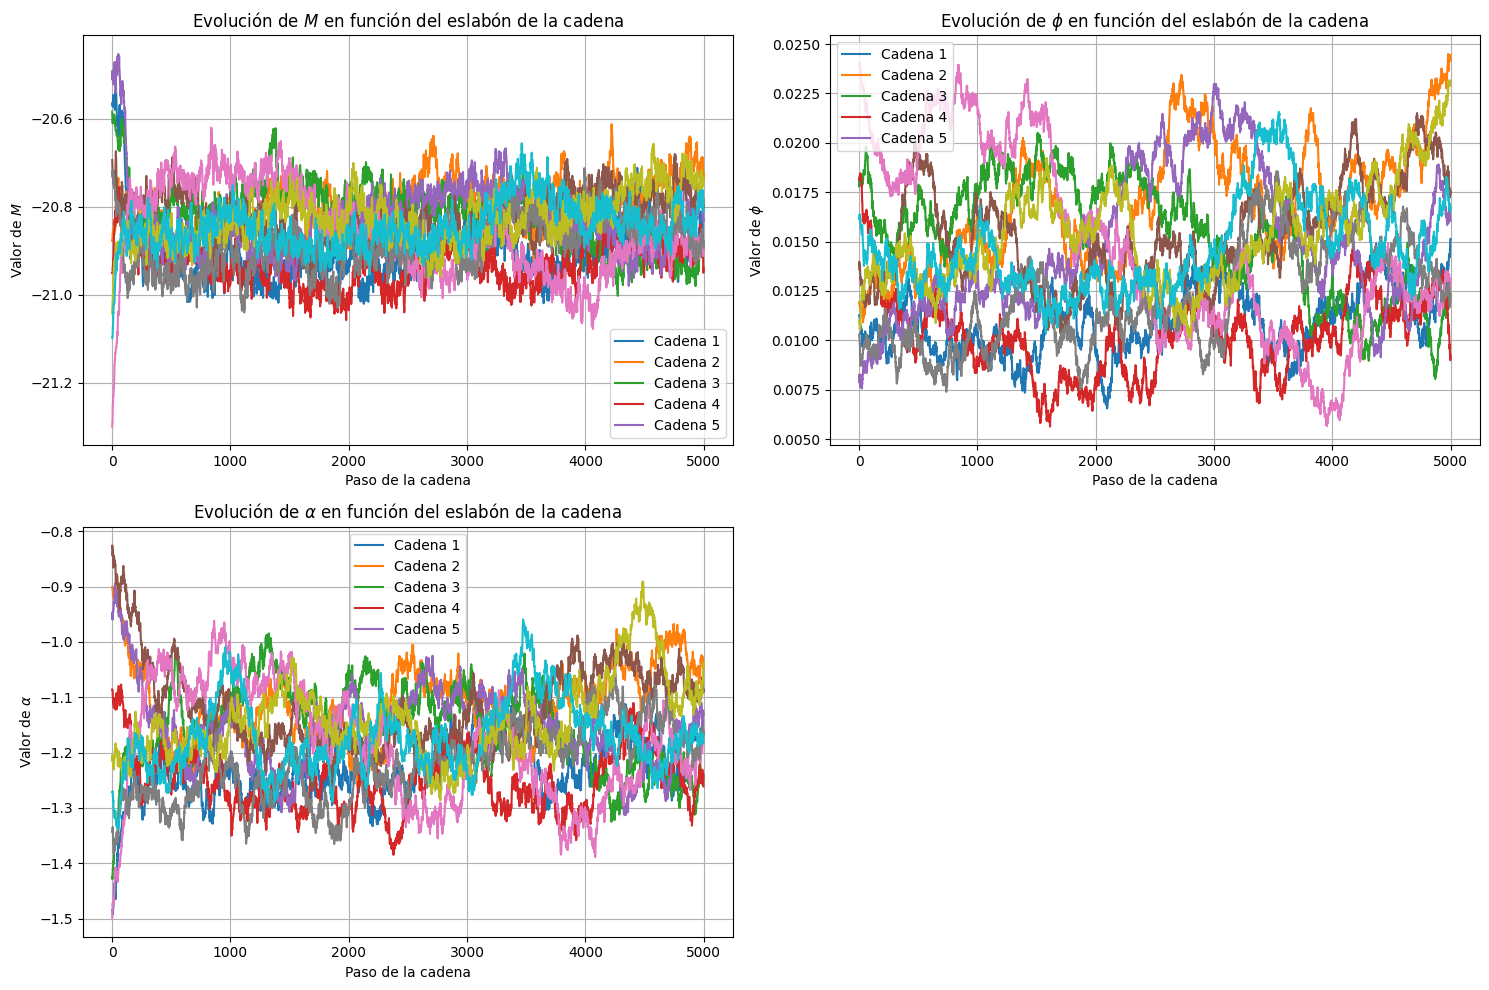

In [ ]:
plt.figure(figsize=(15, 10))

# Subgráfico 1: Evolución de M
plt.subplot(2, 2, 1)
for i in range(n_chains):
    plt.plot(range(N_steps), par_2[i, :, 0], '-', ms=3, label=f'Cadena {i+1}' if i < 5 else "")
plt.xlabel('Paso de la cadena')
plt.ylabel('Valor de $M$')
plt.grid(True)
plt.title('Evolución de $M$ en función del eslabón de la cadena')
plt.legend(loc='best')

# Subgráfico 2: Evolución de φ
plt.subplot(2, 2, 2)
for i in range(n_chains):
    plt.plot(range(N_steps), par_2[i, :, 1], '-', ms=3, label=f'Cadena {i+1}' if i < 5 else "")
plt.xlabel('Paso de la cadena')
plt.ylabel('Valor de $\phi$')
plt.grid(True)
plt.title('Evolución de $\phi$ en función del eslabón de la cadena')
plt.legend(loc='best')

# Subgráfico 3: Evolución de α
plt.subplot(2, 2, 3)
for i in range(n_chains):
    plt.plot(range(N_steps), par_2[i, :, 2], '-', ms=3, label=f'Cadena {i+1}' if i < 5 else "")
plt.xlabel('Paso de la cadena')
plt.ylabel('Valor de $\\alpha$')
plt.grid(True)
plt.title('Evolución de $\\alpha$ en función del eslabón de la cadena')
plt.legend(loc='best')

# Ajuste de espacio entre subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()


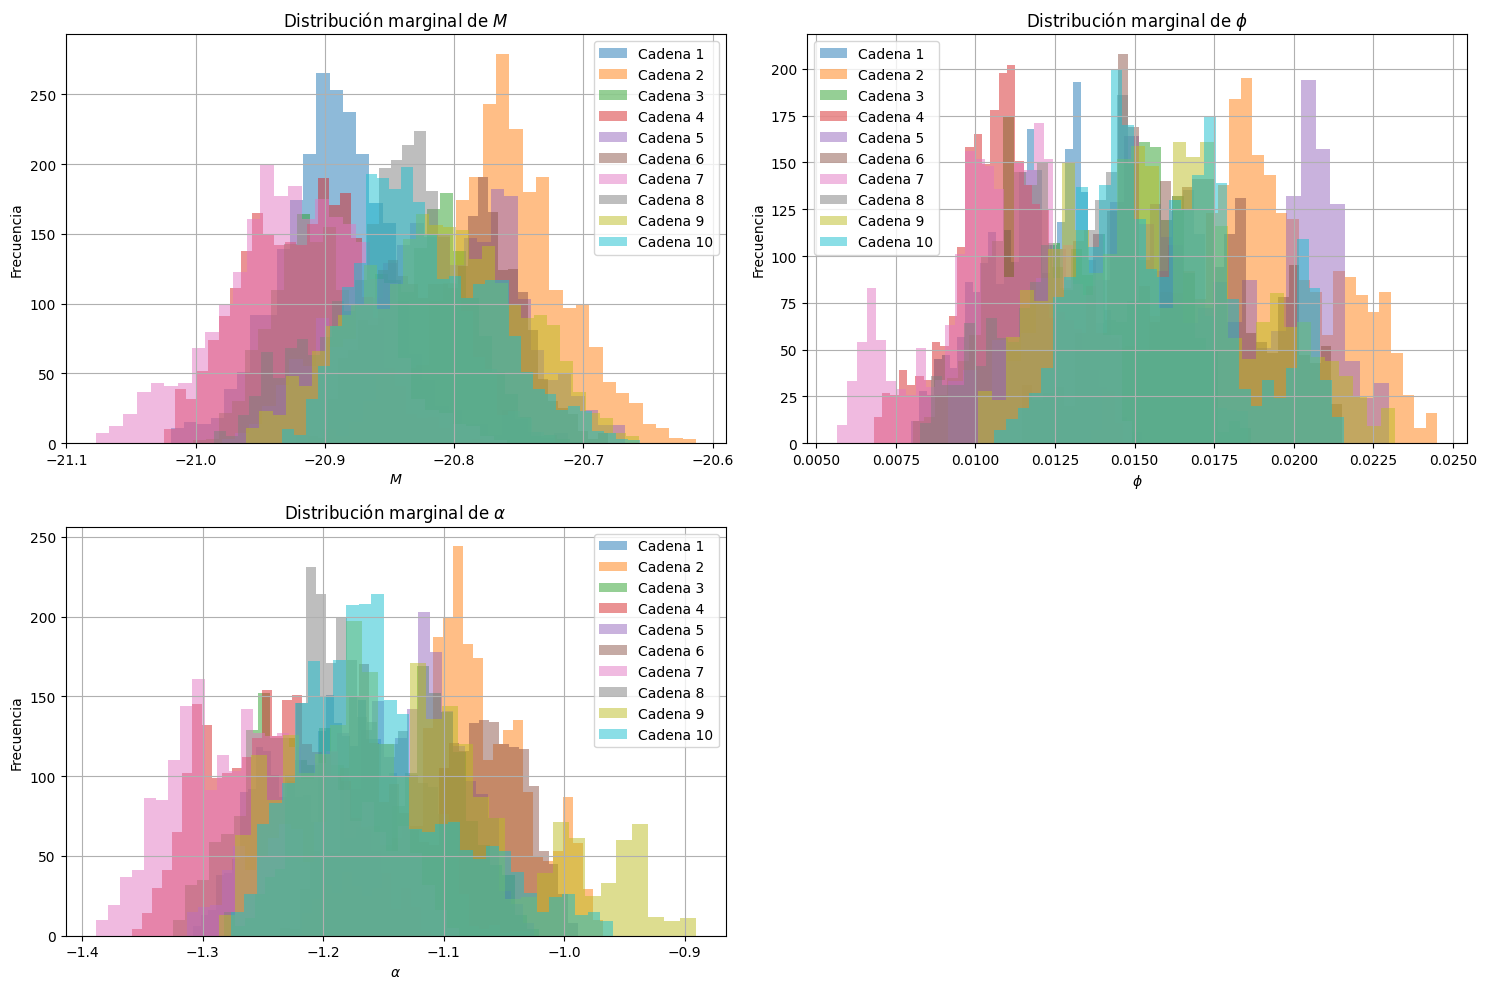

In [ ]:
plt.figure(figsize=(15, 10))

# Subgráfico 1: Distribución marginal de M
plt.subplot(2, 2, 1)
for i in range(n_chains):
    plt.hist(par_2[i, int(N_steps/2):, 0], bins=30, alpha=0.5, label=f'Cadena {i+1}')
plt.xlabel('$M$')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.title('Distribución marginal de $M$')
plt.legend(loc='best')

# Subgráfico 2: Distribución marginal de φ
plt.subplot(2, 2, 2)
for i in range(n_chains):
    plt.hist(par_2[i, int(N_steps/2):, 1], bins=30, alpha=0.5, label=f'Cadena {i+1}')
plt.xlabel('$\phi$')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.title('Distribución marginal de $\phi$')
plt.legend(loc='best')

# Subgráfico 3: Distribución marginal de α
plt.subplot(2, 2, 3)
for i in range(n_chains):
    plt.hist(par_2[i, int(N_steps/2):, 2], bins=30, alpha=0.5, label=f'Cadena {i+1}')
plt.xlabel('$\\alpha$')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.title('Distribución marginal de $\\alpha$')
plt.legend(loc='best')

# Ajuste de espacio entre subgráficos
plt.tight_layout()

# Mostrar la figura con los subgráficos
plt.show()


In [ ]:
# Extraemos los valores de los parámetros después del paso 1000
par_trimmed = par_2[:, 1000:, :]  # Seleccionamos los datos de la cadena a partir del eslabón 1000

# Calcular la media y el error (desviación estándar) para cada parámetro
M_mean = np.mean(par_trimmed[:, :, 0])
M_error = np.std(par_trimmed[:, :, 0])
print(f'Mean of M: {M_mean}, Error: {M_error}')

phi_mean = np.mean(par_trimmed[:, :, 1])
phi_error = np.std(par_trimmed[:, :, 1])
print(f'Mean of φ: {phi_mean}, Error: {phi_error}')

alpha_mean = np.mean(par_trimmed[:, :, 2])
alpha_error = np.std(par_trimmed[:, :, 2])
print(f'Mean of α: {alpha_mean}, Error: {alpha_error}')



Mean of M: -20.851307391095638, Error: 0.07370910922143621
Mean of φ: 0.014199478464287265, Error: 0.0035652775437675197
Mean of α: -1.1733402782192075, Error: 0.08001822912917106


Por lo tanto, a partir del algoritmo de Metropolis Hastings se han obtenido los valores optimos de los parametros. Estos valores son aquellos con los que el modelo de Schechter mejor describe los datos:

$$ M_0 = -20.88 \pm 0.06  $$

$$ \phi_0 = (1.2 \pm 0.3) *10^{-2} $$

$$ \alpha_0 = -1.20 \pm 0.07  $$

En esta instancia, se realizara nuevamente la busqueda de los mejores parametros pero a traves del metodo del gradiente descendente. Este metodo, consiste en trazar una curva en el espacio de parametros cuya trayectoria es determinada por los valores iniciales de estos y siguiendo la direccion del (-)gradiente en cada punto. Es decir que ahora no se explora el espacio de parametros, sino que cada salto esta dirigido en la direccion de $ - ∇(-p(d| \phi,m)) $, o sea se quiere minimizar ($- ∇$ ), el  (-)likelihood ( $ -p(d| \phi,m)$ ).

In [ ]:
I_M = [-21.3, -20.4]
I_fi = [0.007 , 0.025]
I_a = [-1.5 , -0.8]

M_sigma = ( I_M[1] -  I_M[0] )/50
fi_sigma = ( I_fi[1] -  I_fi[0] )/50.0
a_sigma = ( I_a[1] -  I_a[0] )/50.0

print(M_sigma, fi_sigma , a_sigma)

0.018000000000000044 0.00036 0.013999999999999999


In [ ]:
# defino el gradiente del (-)likelihood
M = data['MAG']
f = data['PHI']

def grad_likeli(par,x = M, y = f ,model = phi_model ):   # parametros = m , phi , alpha
    sigma = (e_inf + e_sup)*0.5

    m1 = model(x,par)   # par[0] = M0 , par[1] = Phi0 , par[2] = Alpha0
    g = -0.4*(x - par[0])
    factor = ( -1 / sigma**2 )*(f - m1)
    #print(f)

    z = np.zeros(3)
    z[0] = np.sum( factor*m1*np.log(10)*0.4*( par[2] + 1 - 10**g ) )
    b = m1*np.log(10)*0.4*( par[2] + 1 - 10**g)
    #print(b)
    z[1] = np.sum( factor*m1/par[1]  )
    z[2] = np.sum(  factor*m1*np.log(10)*g)

    return(z)

In [ ]:
def Gradiente_Descendente(N ,  M0 = -20.5 , phi0 = 0.008 , alpha0 = -0.9):    # data son los datos, m es el modelo, dsp estan los valores iniciales y N  es el largo de la cadena

    #defino el step/salto maximo que voy a dar para cada parámetro
    params = np.zeros((N, 3)) # matriz donde cada fila son los 3 parametros con (-)likelihoods cada vez mas chicas
    params[0][0] , params[0][1]  , params[0][2] = M0 , phi0 , alpha0  # defino los parametros iniciales
    Ls = np.zeros(N) # aca voy a poner los valores sucesivos del likelihood de cada iteracion

    for i in range(0,N-1):
        step = grad_likeli(params[i])
        #print(step)
        norm = ( step[0]**2 + step[1]**2 + step[2]**2 )**(0.5)
        #print('norma',norm)

        params[i+1][0] = params[i][0] - (M_sigma*step[0])/norm
        params[i+1][1] = params[i][1] - (fi_sigma*step[1])/norm
        params[i+1][2] = params[i][2] - (a_sigma*step[2])/norm

        #print( 'step',(M_sigma*step[0])/norm, (fi_sigma*step[1])/norm , (a_sigma*step[2])/norm )

        Ls[i] = log_posterior([M , f], phi_model , params[i])
        #print(Ls[i])
    return params, Ls


In [ ]:
# Definir el número de pasos de la cadena
N_final = 1500

# Ejecutar el algoritmo de Gradiente Descendente
parameters, L_grad = Gradiente_Descendente(N_final, M0=-20.5, phi0=0.008, alpha0=-0.9)

# Imprimir los parámetros finales con un formato legible
M_final, phi_final, alpha_final = parameters[N_final - 1]  # Últimos valores de los parámetros

print(f"Estos son los parámetros finales:")
print(f"M_0: {M_final:.4f}, phi_0: {phi_final:.4f}, alpha_0: {alpha_final:.4f}")


Estos son los parámetros finales:
M_0: -20.8940, phi_0: 0.0121, alpha_0: -1.2184


Text(0.5, 1.0, 'Corte en el Espacio de Parámetros, M = cte')

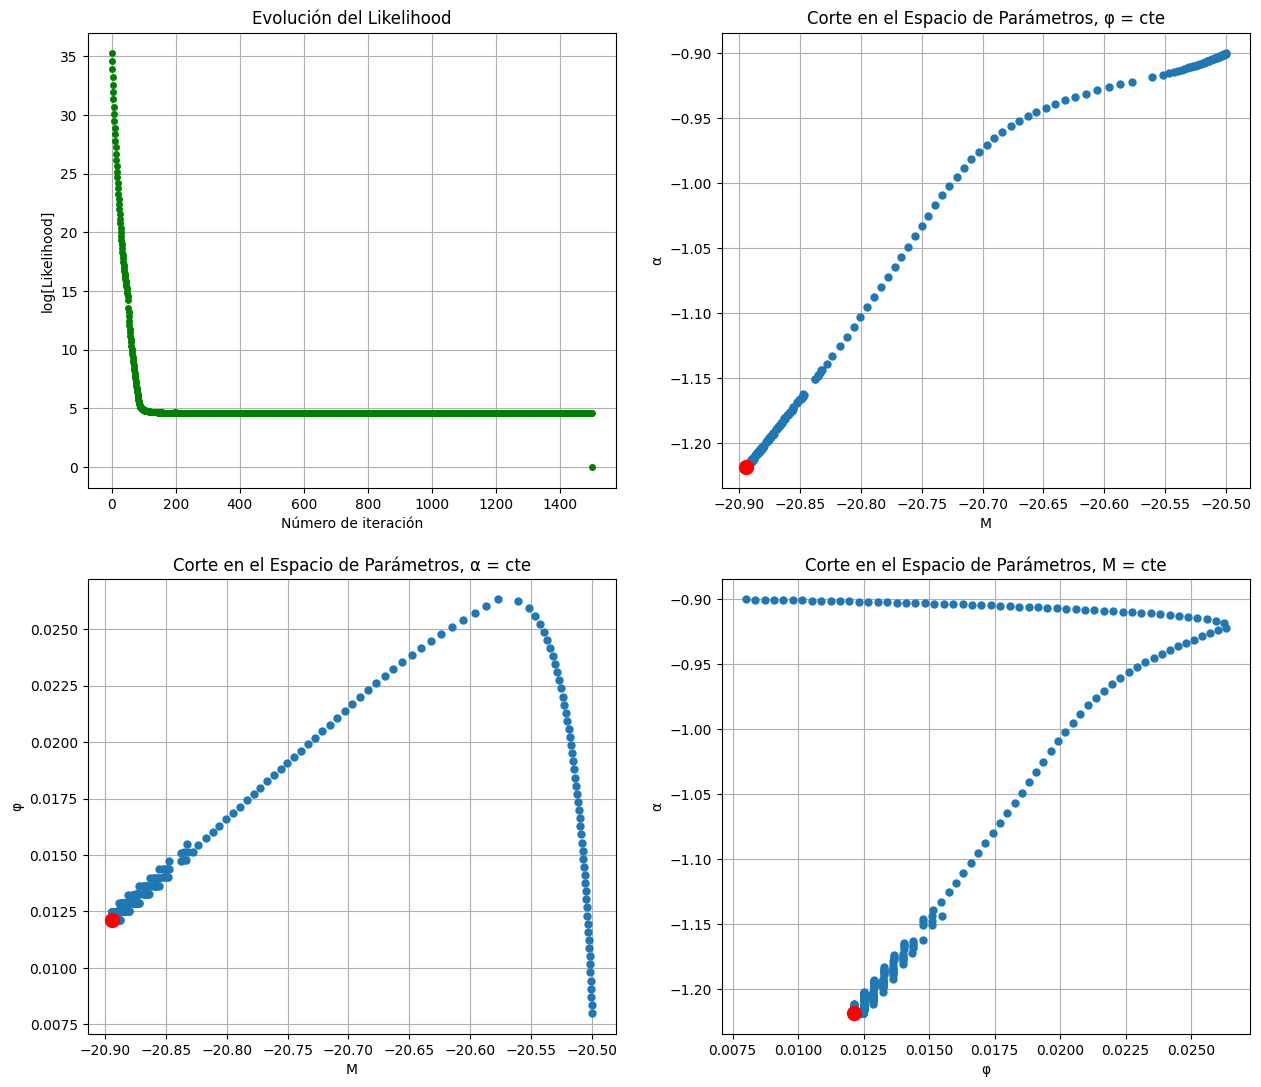

In [ ]:
plt.figure(figsize = (15,13))

plt.subplot(2,2,1)
plt.plot(-L_grad, '.' , ms = 8 , color = 'g')
plt.xlabel('Número de iteración')
plt.ylabel('log[Likelihood]')
plt.grid()
plt.title('Evolución del Likelihood')

plt.subplot(2,2,2)
plt.plot(parameters[:,0],parameters[:,2],'.',ms = 10)
plt.plot(parameters[N_final-1,0],parameters[N_final-1,2], '.' ,ms = 20,color = 'r')
plt.xlabel('M')
plt.ylabel('α')

plt.grid()
plt.title('Corte en el Espacio de Parámetros, φ = cte')


plt.subplot(2,2,3)
plt.plot(parameters[:,0],parameters[:,1],'.',ms = 10)
plt.plot(parameters[N_final-1,0],parameters[N_final-1,1], '.' ,ms = 20,color = 'r')
plt.xlabel('M')

plt.ylabel('φ')
plt.grid()
plt.title('Corte en el Espacio de Parámetros, α = cte')


plt.subplot(2,2,4)
plt.plot(parameters[:,1],parameters[:,2],'.',ms = 10)
plt.plot(parameters[N_final-1,1],parameters[N_final-1,2], '.' ,ms = 20,color = 'r')
plt.xlabel('φ')
plt.ylabel('α')
#plt.semilogy()
plt.grid()
plt.title('Corte en el Espacio de Parámetros, M = cte')


Text(0.5, 0, 'α')

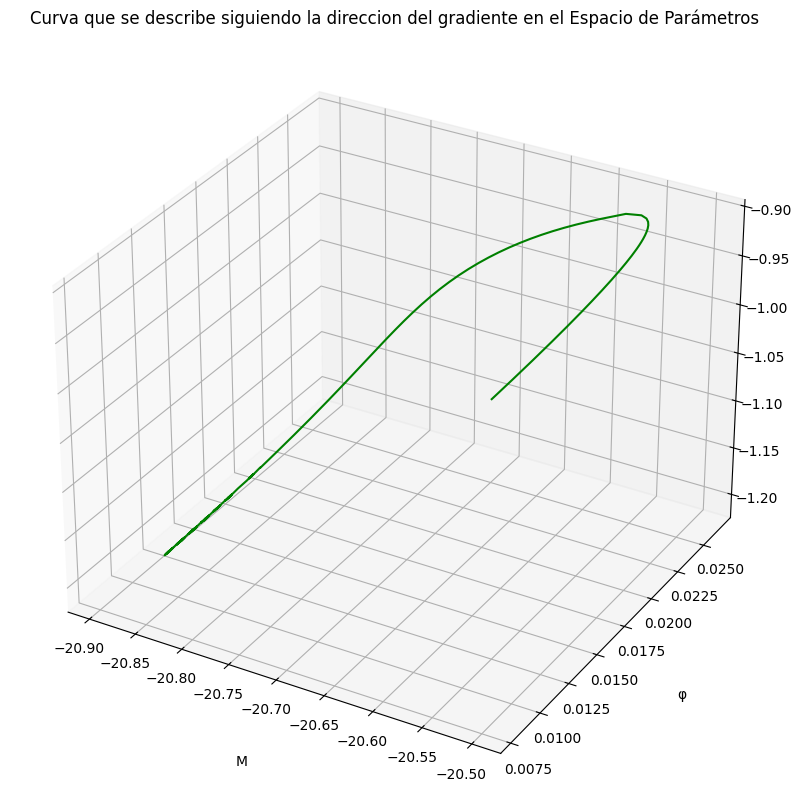

In [ ]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection ='3d')
ax.plot3D(  parameters[:,0] ,parameters[:,1], parameters[:,2] , 'green')
ax.set_title('Curva que se describe siguiendo la direccion del gradiente en el Espacio de Parámetros')
ax.set_xlabel('M', labelpad=20)
ax.set_ylabel('φ', labelpad=20)
ax.set_zlabel('α', labelpad=20)

En este caso, a diferencia de lo obtenido en M-H, se puede observar una curva directa que parte de los valores iniciales y se estabiliza alrededor de los parametros que minimizan el (-)likelihood. Otra diferencia clara es que demora mucho menos en converger, con 300 iteraciones ya practicamente se estabilizan los valores de los parametros.




A continuacion, se corren varios caminos de gradiente descendiente, a partir de distintos valores iniciales aleatorios y se calcula el valor medio de los parametros optimos obtenidos con este metodo.

In [ ]:
N_steps = 1500  #numeros maximo de pasos en una cadena
n_paths = 10     # numero de realizaciones (caminos) del metodo del gradiente descendente

I_M = [-21.3, -20.4]
I_fi = [0.007 , 0.025]
I_a = [-1.5 , -0.8]

eps = 0.001  # no quiero que me elija los extremos del intervalo porque el prior va a dar -inf
M_values = np.linspace(I_M[0] + eps , I_M[1] - eps , 50)
fi_values = np.linspace(I_fi[0] + eps , I_fi[1] - eps , 50)
a_values = np.linspace(I_a[0] + eps , I_a[1] - eps , 50)

#np.random.seed()
m_init = np.random.choice(M_values , n_paths , replace=False)
f_init = np.random.choice(fi_values , n_paths, replace=False )
a_init = np.random.choice(a_values , n_paths, replace=False)


In [ ]:
N_steps = 1500  #numeros maximo de pasos en una cadena
n_paths = 10     # numero de realizaciones (caminos) del metodo del gradiente descendente

I_M = [-21.3, -20.4]
I_fi = [0.007 , 0.025]
I_a = [-1.5 , -0.8]

eps = 0.001  # no quiero que me elija los extremos del intervalo porque el prior va a dar -inf
M_values = np.linspace(I_M[0] + eps , I_M[1] - eps , 50)
fi_values = np.linspace(I_fi[0] + eps , I_fi[1] - eps , 50)
a_values = np.linspace(I_a[0] + eps , I_a[1] - eps , 50)

#np.random.seed()
m_init = np.random.choice(M_values , n_paths , replace=False)
#print(m_init)
f_init = np.random.choice(fi_values , n_paths, replace=False )
#print(f_init)
a_init = np.random.choice(a_values , n_paths, replace=False)
#print(a_init)

In [ ]:
pars = np.zeros((n_paths,N_steps,3))
Likelis = np.zeros((n_paths, N_steps))

for i in range(0,n_paths):
    pars[i,:,:] , Likelis[i,:] = Gradiente_Descendente(N_steps , m_init[i] , f_init[i] , a_init[i])

Text(0.5, 1.0, 'Corte en el Espacio de Parámetros, M = cte')

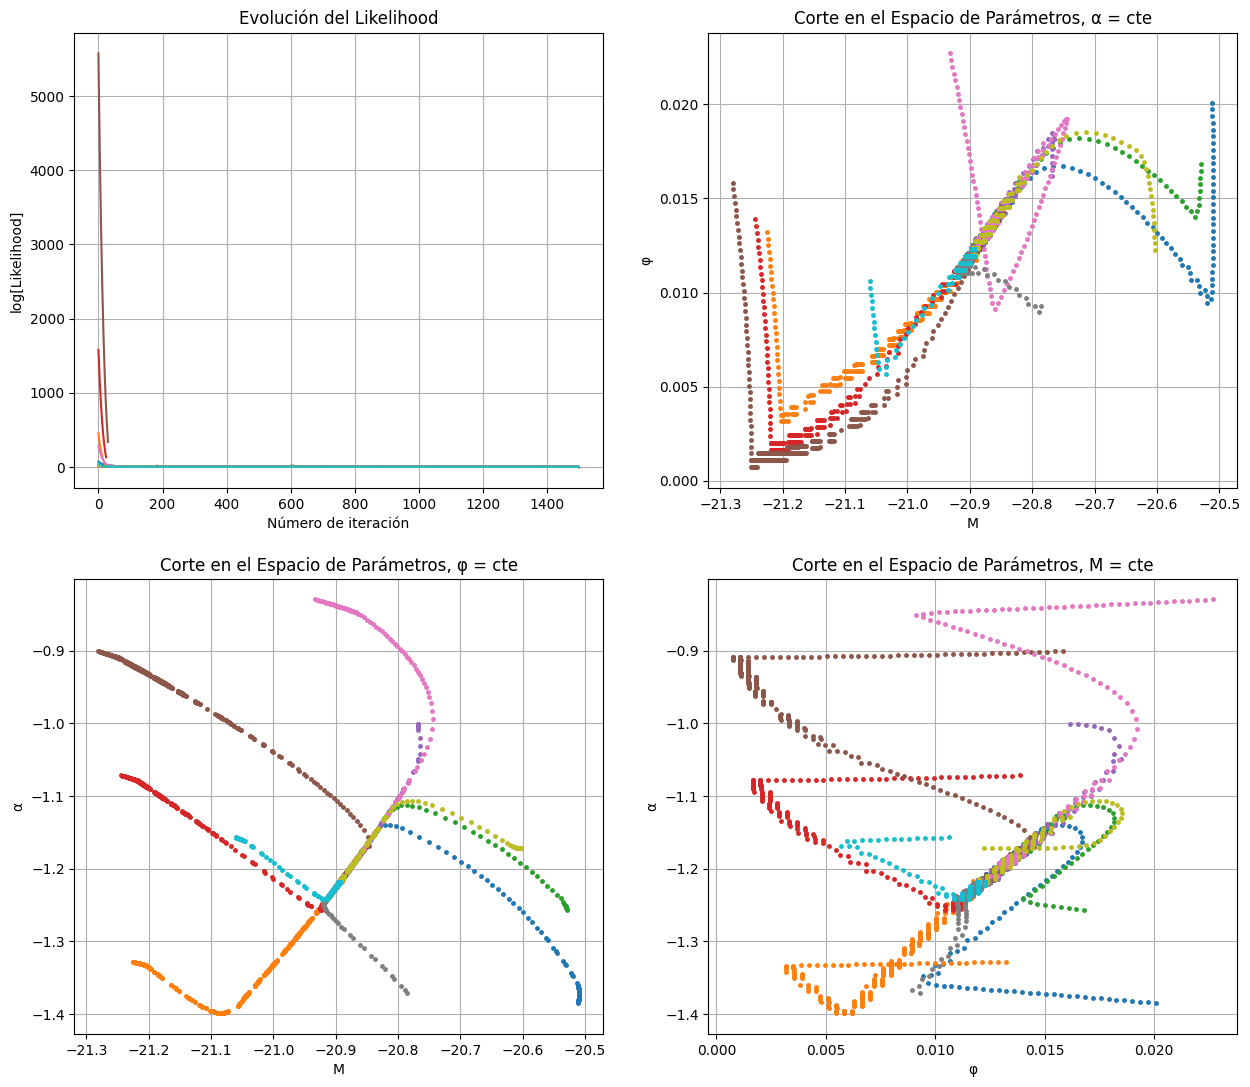

In [ ]:
plt.figure(figsize = (15,13))

plt.subplot(2,2,1)
for i in range(0,n_paths):
   plt.plot(-Likelis[i,:])

plt.xlabel('Número de iteración')
plt.ylabel('log[Likelihood]')
plt.grid()
plt.title('Evolución del Likelihood')


plt.subplot(2,2,2)
for i in range(n_paths):
  plt.plot(pars[i,:,0],pars[i,:,1],'.',ms = 5)

plt.xlabel('M')
plt.ylabel('φ')
plt.grid()
plt.title('Corte en el Espacio de Parámetros, α = cte')


plt.subplot(2,2,3)
for i in range(n_paths):
  plt.plot(pars[i,:,0],pars[i,:,2],'.',ms = 5)

plt.xlabel('M')
plt.ylabel('α')
plt.grid()
plt.title('Corte en el Espacio de Parámetros, φ = cte')


plt.subplot(2,2,4)
for i in range(n_paths):
  plt.plot(pars[i,:,1],pars[i,:,2],'.',ms = 5)

plt.xlabel('φ')
plt.ylabel('α')
plt.grid()
plt.title('Corte en el Espacio de Parámetros, M = cte')

In [ ]:
# Inicializar listas para almacenar los valores de M, phi y alpha
M_list = []
phi_list = []
alpha_list = []

# Obtener el valor medio de M, phi y alpha para cada cadena de Markov
for i in range(n_paths):
    M_list.append(pars[i, 600:, 0])
    phi_list.append(pars[i, 600:, 1])
    alpha_list.append(pars[i, 600:, 2])

# Calcular los promedios y errores para M, phi y alpha
def calculate_mean_and_error(param_list):
    mean = np.mean(param_list)
    error = np.std(param_list)
    return mean, error

# Calcular y mostrar el M promedio y su error
M_mean_grad, M_error_grad = calculate_mean_and_error(M_list)
print(f"M promedio: {M_mean_grad}, Error de M: {M_error_grad}")

# Calcular y mostrar el PHI promedio y su error
phi_mean_grad, phi_error_grad = calculate_mean_and_error(phi_list)
print(f"PHI promedio: {phi_mean_grad}, Error de PHI: {phi_error_grad}")

# Calcular y mostrar el ALPHA promedio y su error
alpha_mean_grad, alpha_error_grad = calculate_mean_and_error(alpha_list)
print(f"ALPHA promedio: {alpha_mean_grad}, Error de ALPHA: {alpha_error_grad}")


M promedio: -20.8939393878091, Error de M: 0.004875437914724617
PHI promedio: 0.0122198659570206, Error de PHI: 0.0003442491892911516
ALPHA promedio: -1.2175059521047606, Error de ALPHA: 0.00911345927536589


A partir de realizar un promedio para cada parametro de todos los valores obtenidos en todos los caminos, despues de los 600 primeros pasos, se obtienen los siguientes resultados:

$$ M_0 = -20.894 \pm 0.005  $$

$$ \phi_0 = (1.22 \pm 0.03) *10^{-2} $$

$$ \alpha_0 = -1.218 \pm 0.009  $$
Se observa que los mismos concuerdan con los encontrados por M-H y al ser este metodo mas eficiente en cuanto a computo para obtenerlos, es el mas conveniente de usar. No obstante, en otro caso donde el likelihood no tenga un solo minimo, lo mas prudente seria usar M-H y explorar adecuadamente el espacio de parametros.

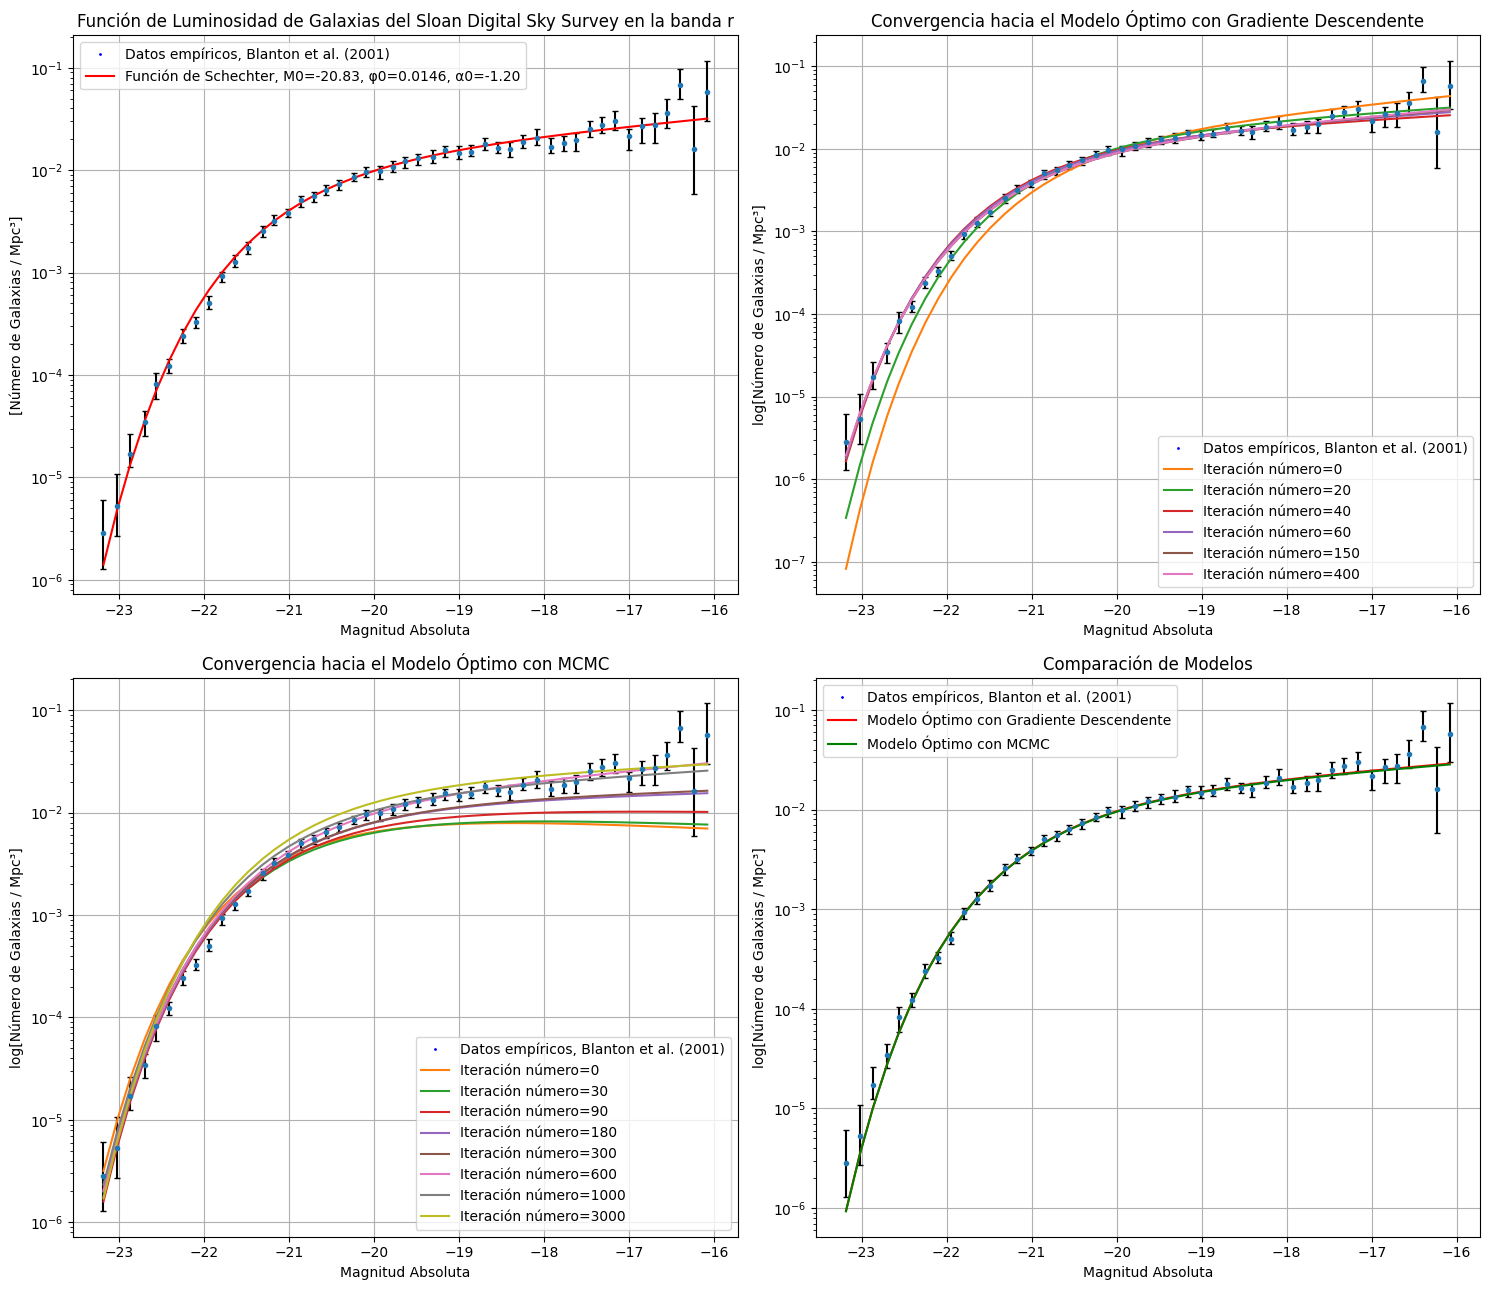

In [ ]:
import matplotlib.pyplot as plt

# Definir el tamaño de la figura
plt.figure(figsize=(15, 13))

# Primer gráfico: Función de Luminosidad de Galaxias del Sloan Digital Sky Survey en la banda r
plt.subplot(2, 2, 1)
# Errores de los datos
f_error = [data['error_inf'], data['error_sup']]

# Datos empíricos
plt.plot(M, f, '.', ms=2, color='b', label="Datos empíricos, Blanton et al. (2001)")
plt.errorbar(M, f, yerr=f_error, fmt=".", capsize=2, ecolor="k")

# Etiquetas y ajustes
plt.xlabel('Magnitud Absoluta')
plt.ylabel('[Número de Galaxias / Mpc³]')
plt.grid(True)
plt.semilogy()
plt.title('Función de Luminosidad de Galaxias del Sloan Digital Sky Survey en la banda r')

# Función de Schechter teórica
y_teor = phi_model(M, p0_c)
plt.plot(M, y_teor, color='r', label="Función de Schechter, M0=-20.83, φ0=0.0146, α0=-1.20")

# Leyenda
plt.legend()

# Segundo gráfico: Convergencia hacia el Modelo Óptimo con Gradiente Descendente
plt.subplot(2, 2, 2)
# Datos empíricos
plt.plot(M, f, '.', ms=2, color='b', label="Datos empíricos, Blanton et al. (2001)")
plt.errorbar(M, f, yerr=f_error, fmt=".", capsize=2, ecolor="k")

# Iteraciones con gradiente descendente
for i in (0, 20, 40, 60, 150, 400):
    y_grad = phi_model(M, pars[2, i, :])
    plt.plot(M, y_grad, label=f'Iteración número={i}')

# Etiquetas y ajustes
plt.xlabel('Magnitud Absoluta')
plt.ylabel('log[Número de Galaxias / Mpc³]')
plt.grid(True)
plt.semilogy()
plt.title('Convergencia hacia el Modelo Óptimo con Gradiente Descendente')

# Leyenda
plt.legend()

# Tercer gráfico: Convergencia hacia el Modelo Óptimo con MCMC
plt.subplot(2, 2, 3)
# Datos empíricos
plt.plot(M, f, '.', ms=2, color='b', label="Datos empíricos, Blanton et al. (2001)")
plt.errorbar(M, f, yerr=f_error, fmt=".", capsize=2, ecolor="k")

# Iteraciones con MCMC
for i in (0, 30, 90, 180, 300, 600, 1000, 3000):
    y_MCMC = phi_model(M, par_2[1, i, :])
    plt.plot(M, y_MCMC, label=f'Iteración número={i}')

# Etiquetas y ajustes
plt.xlabel('Magnitud Absoluta')
plt.ylabel('log[Número de Galaxias / Mpc³]')
plt.grid(True)
plt.semilogy()
plt.title('Convergencia hacia el Modelo Óptimo con MCMC')

# Leyenda
plt.legend()

# Cuarto gráfico: Comparación de Modelos
plt.subplot(2, 2, 4)
# Datos empíricos
plt.plot(M, f, '.', ms=2, color='b', label="Datos empíricos, Blanton et al. (2001)")
plt.errorbar(M, f, yerr=f_error, fmt=".", capsize=2, ecolor="k")

# Modelo óptimo con Gradiente Descendente
par_optim_grad = (-20.771, 0.0151, -1.173)
y_optim_grad = phi_model(M, par_optim_grad)
plt.plot(M, y_optim_grad, label='Modelo Óptimo con Gradiente Descendente', color='r')

# Modelo óptimo con MCMC
par_optim_MCMC = (-20.77, 0.015, -1.17)
y_optim_MCMC = phi_model(M, par_optim_MCMC)
plt.plot(M, y_optim_MCMC, label='Modelo Óptimo con MCMC', color='g')

# Etiquetas y ajustes
plt.xlabel('Magnitud Absoluta')
plt.ylabel('log[Número de Galaxias / Mpc³]')
plt.grid(True)
plt.semilogy()
plt.title('Comparación de Modelos')

# Leyenda
plt.legend()

# Mostrar la figura
plt.tight_layout()
plt.show()


## Teorema de Bayes

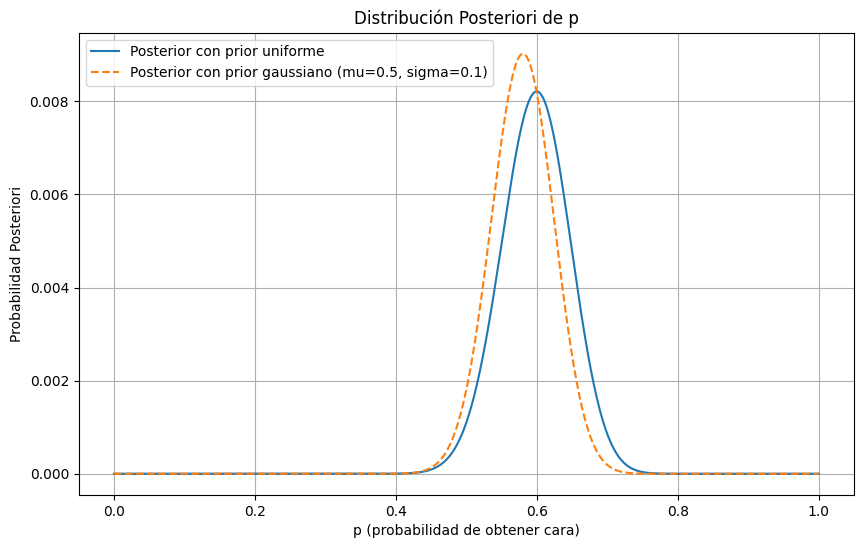

In [ ]:
from scipy.stats import norm

# Datos
num_lanzamientos = 100
num_caras = 60
num_secas = num_lanzamientos - num_caras

# Espacio de p
p_values = np.linspace(0, 1, 1000)

# Prior uniforme
def prior_uniform(p):
    return 1 if 0 <= p <= 1 else 0

# Prior gaussiano con media 0.5 y desviación estándar 0.1
def prior_gaussian(p, mu=0.5, sigma=0.1):
    return norm.pdf(p, mu, sigma)

# Likelihood: Binomial
def likelihood(p, caras, secas):
    return p**caras * (1 - p)**secas

# Posterior con prior uniforme
posterior_uniform = [likelihood(p, num_caras, num_secas) * prior_uniform(p) for p in p_values]
posterior_uniform /= np.sum(posterior_uniform)  # Normalización

# Posterior con prior gaussiano
posterior_gaussian = [likelihood(p, num_caras, num_secas) * prior_gaussian(p) for p in p_values]
posterior_gaussian /= np.sum(posterior_gaussian)  # Normalización

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(p_values, posterior_uniform, label="Posterior con prior uniforme")
plt.plot(p_values, posterior_gaussian, label="Posterior con prior gaussiano (mu=0.5, sigma=0.1)", linestyle='--')
plt.xlabel("p (probabilidad de obtener cara)")
plt.ylabel("Probabilidad Posteriori")
plt.title("Distribución Posteriori de p")
plt.grid()
plt.legend()
plt.show()




## Frecuentistas vs Bayesianos

Estimación de lambda (MLE): 0.41311379715788804


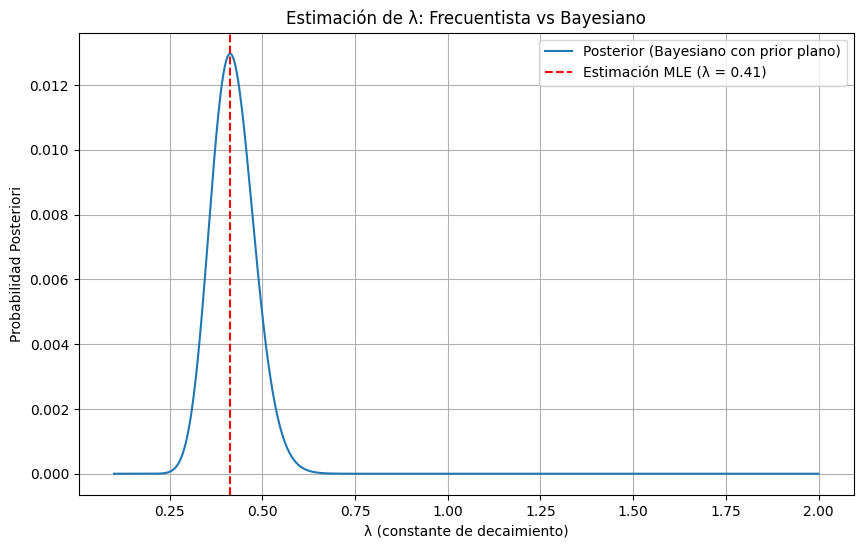

In [ ]:
from scipy.stats import expon

# Parámetros de la simulación
lambda_true = 0.5  # Valor verdadero de lambda
num_observaciones = 50

# Simulación de los tiempos de decaimiento
datos = np.random.exponential(1 / lambda_true, num_observaciones)

# Estimación de lambda usando MLE
lambda_mle = 1 / np.mean(datos)
print(f"Estimación de lambda (MLE): {lambda_mle}")

# Estimación de lambda usando inferencia Bayesiana con prior plano
# Espacio de lambda
lambda_values = np.linspace(0.1, 2, 1000)

# Likelihood en función de lambda
def likelihood_decay(lambda_val, datos):
    return np.prod(lambda_val * np.exp(-lambda_val * datos))

# Prior plano
def prior_flat(lambda_val):
    return 1

# Calculo de la posterior
posterior_bayes = [likelihood_decay(l, datos) * prior_flat(l) for l in lambda_values]
posterior_bayes /= np.sum(posterior_bayes)  # Normalización

# Graficar la distribución posterior
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, posterior_bayes, label="Posterior (Bayesiano con prior plano)")
plt.axvline(lambda_mle, color='r', linestyle='--', label=f"Estimación MLE (λ = {lambda_mle:.2f})")
plt.xlabel("λ (constante de decaimiento)")
plt.ylabel("Probabilidad Posteriori")
plt.title("Estimación de λ: Frecuentista vs Bayesiano")
plt.grid()
plt.legend()
plt.show()